### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
pd.pandas.set_option('display.max_columns',None)

## Step 1: Loading the Data:

In [2]:
dataset="D:/Nexthike IT Solutions/Project-3 House Price prediction/housing_data.csv"
df= pd.read_csv(dataset)
df

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave   NaN   
1              1       SC20       RL           80     9600   Pave   NaN   
2              2       SC60       RL           68    11250   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
4              4       SC60       RL           84    14260   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
1455      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
1456      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1457      Reg         Lvl    AllPub    Inside       Gtl      Crawfor   
1458      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1459      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1455       Norm       Norm     1Fam     2Story            6            5   
1456       Norm       Norm     1Fam     1Story            6            6   
1457       Norm       Norm     1Fam     2Story            7            9   
1458       Norm       Norm     1Fam     1Story            5            6   
1459       Norm       Norm     1Fam     1Story            5            6   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
1          1976          1976     Gable  CompShg     MetalSd     MetalSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000          2000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1455       1999          2000     Gable  CompShg     VinylSd     VinylSd   
1456       1978          1988     Gable  CompShg     Plywood     Plywood   
1457       1941          2006     Gable  CompShg     CemntBd     CmentBd   
1458       1950          1996       Hip  CompShg     MetalSd     MetalSd   
1459       1965          1965     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace         196        Gd        TA      PConc       Gd       TA   
1           NaN           0        TA        TA     CBlock       Gd       TA   
2       BrkFace         162        Gd        TA      PConc       Gd       TA   
3           NaN           0        TA        TA     BrkTil       TA       Gd   
4       BrkFac

In [3]:
df.describe()

Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [4]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         196        Gd        TA      PConc       Gd       TA           No   
1           0        TA        TA     CBlock       Gd       TA           Gd   
2         162        Gd        TA      PConc       Gd       TA           Mn   
3           0        TA        TA     BrkTil       TA       Gd           No   
4         350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          No   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA 

In [5]:
df.tail()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
1455      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
1456      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1457      Reg         Lvl    AllPub    Inside       Gtl      Crawfor   
1458      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1459      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
1455       Norm       Norm     1Fam     2Story            6            5   
1456       Norm       Norm     1Fam     1Story            6            6   
1457       Norm       Norm     1Fam     2Story            7            9   
1458       Norm       Norm     1Fam     1Story            5            6   
1459       Norm       Norm     1Fam     1Story            5            6   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
1455       1999          2000     Gable  CompShg     VinylSd     VinylSd   
1456       1978          1988     Gable  CompShg     Plywood     Plywood   
1457       1941          2006     Gable  CompShg     CemntBd     CmentBd   
1458       1950          1996       Hip  CompShg     MetalSd     MetalSd   
1459       1965          1965     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455        NaN           0        TA        TA      PConc       Gd       TA   
1456      Stone         119        TA        TA     CBlock       Gd       TA   
1457        NaN           0        Ex        Gd      Stone       TA       Gd   
1458        NaN           0        TA        TA     CBlock       TA       TA   
1459        NaN           0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3  

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 2: Cleaning the Data

#### Check for N/A values,missing values,duplicate values, dropping unwanted column, identify unique values,& outliers for data:

In [8]:
# Checking for any N/A values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4), '% missing values')

Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
GarageYrBlt 0.0555 % missing values


Here we just check the missing values can't handle here, just check how many missing values in each & every feature.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [9]:
# Checking for any duplicates values
df.duplicated().sum()

0

In [10]:
# As Unnamed Column will not be participating in any prediction. So we can Drop it
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          SC60       RL           65     8450   Pave   NaN      Reg   
1          SC20       RL           80     9600   Pave   NaN      Reg   
2          SC60       RL           68    11250   Pave   NaN      IR1   
3          SC70       RL           60     9550   Pave   NaN      IR1   
4          SC60       RL           84    14260   Pave   NaN      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455       SC60       RL           62     7917   Pave   NaN      Reg   
1456       SC20       RL           85    13175   Pave   NaN      Reg   
1457       SC70       RL           66     9042   Pave   NaN      Reg   
1458       SC20       RL           68     9717   Pave   NaN      Reg   
1459       SC20       RL           75     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            196        Gd        TA      PConc       Gd       TA   
1              0        TA        TA     CBlock       Gd       TA   
2            162        Gd        TA      PConc       Gd       TA   
3              0        TA        TA     BrkTil       TA       Gd   
4            350        Gd        TA      PConc       Gd       TA   
...        

In [11]:
df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     57.623288   10516.828082     6.099315     5.575342  1971.267808   
std      34.664304    9981.264932     1.382997     1.112799    30.202904   
min       0.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      42.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      63.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      79.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411   
std       20.645407   180.731373   456.098091   161.319273   441.866955   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000   
mean       1.046575      6.517808     0.613014  1978.506164     1.767123   
std        0.220338      1.625393     0.644666    24.689725     0.747315   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%        1.000000      5.000000     0.000000  1961.000000     1.000000   
50%        1.000000      6.000000     1.000000  1980.000000     2.000000   
75%        1.000000      7.000000     1.000000  2002.000000     2.000000   
max        3.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000

In [12]:
# Identify unique values
unique_values={col:df[col].nunique() for col in df.columns}
print("Unique Values:", unique_values)

Unique Values: {'MSSubClass': 15, 'MSZoning': 5, 'LotFrontage': 111, 'LotArea': 1073, 'Street': 2, 'Alley': 2, 'LotShape': 4, 'LandContour': 4, 'Utilities': 2, 'LotConfig': 5, 'LandSlope': 3, 'Neighborhood': 25, 'Condition1': 9, 'Condition2': 8, 'BldgType': 5, 'HouseStyle': 8, 'OverallQual': 10, 'OverallCond': 9, 'YearBuilt': 112, 'YearRemodAdd': 61, 'RoofStyle': 6, 'RoofMatl': 8, 'Exterior1st': 15, 'Exterior2nd': 16, 'MasVnrType': 3, 'MasVnrArea': 327, 'ExterQual': 4, 'ExterCond': 5, 'Foundation': 6, 'BsmtQual': 5, 'BsmtCond': 5, 'BsmtExposure': 4, 'BsmtFinType1': 7, 'BsmtFinSF1': 637, 'BsmtFinType2': 7, 'BsmtFinSF2': 144, 'BsmtUnfSF': 780, 'TotalBsmtSF': 721, 'Heating': 6, 'HeatingQC': 5, 'CentralAir': 2, 'Electrical': 5, '1stFlrSF': 753, '2ndFlrSF': 417, 'LowQualFinSF': 24, 'GrLivArea': 861, 'BsmtFullBath': 4, 'BsmtHalfBath': 3, 'FullBath': 4, 'HalfBath': 3, 'BedroomAbvGr': 8, 'KitchenAbvGr': 4, 'KitchenQual': 4, 'TotRmsAbvGrd': 12, 'Functional': 7, 'Fireplaces': 4, 'FireplaceQu': 6

In [13]:
# Outliers Detection using IQR (Only for numeric columns) 
numeric_cols=df.select_dtypes(include=['number']).columns
Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers Count Per Column:\n", outliers)

Outliers Count Per Column:
 LotFrontage       16
LotArea           69
OverallQual        2
OverallCond      125
YearBuilt          7
YearRemodAdd       0
MasVnrArea        98
BsmtFinSF1         7
BsmtFinSF2       167
BsmtUnfSF         29
TotalBsmtSF       61
1stFlrSF          20
2ndFlrSF           2
LowQualFinSF      26
GrLivArea         31
BsmtFullBath       1
BsmtHalfBath      82
FullBath           0
HalfBath           0
BedroomAbvGr      35
KitchenAbvGr      68
TotRmsAbvGrd      30
Fireplaces         5
GarageYrBlt        0
GarageCars         5
GarageArea        21
WoodDeckSF        32
OpenPorchSF       77
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
YrSold             0
SalePrice         61
dtype: int64


### Data Analysis

In [14]:
# Let us examine numerical features in the dataset
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
numerical_features.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0           65     8450            7            5       2003          2003   
1           80     9600            6            8       1976          1976   
2           68    11250            7            5       2001          2002   
3           60     9550            7            5       1915          1970   
4           84    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0         196         706           0        150          856       856   
1           0         978           0        284         1262      1262   
2         162         486           0        434          920       920   
3           0         216           0        540          756       961   
4         350         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  YrSold  SalePrice  
0              0          0            0         0        0    2008     208500  
1              0          0            0         0        0    2007     181500  
2              0          0            0         0        0    2008     223500  
3            272          0            0         0        0    2006     140000  
4              0          0            0         0        0    2008     250000

In [16]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
# Let us explore the contents of temporal variables
for feature in year_feature:
 print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

## Step 3.Univariate Analysis

#### A Statistical Analysis 

#### To Find Mean, Median, & Mode per column

In [18]:
df.select_dtypes(include=['number']).mean()

LotFrontage          57.623288
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.117123
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPorch          15.060959
PoolArea              2.758904
MiscVal 

In [19]:
df.select_dtypes(include=['number']).median()

LotFrontage          63.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64

In [20]:
df.select_dtypes(include=['number']).mode()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            0     7200            5            5       2006          1950   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0           0           0           0          0            0       864   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0             0        864             0             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         0             3             1             6           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2005.0           2           0           0            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  YrSold  SalePrice  
0              0          0            0         0        0    2009     140000

#### To Find Standard Deviation & Variance per column

In [21]:
df.select_dtypes(include=['number']).std()

LotFrontage         34.664304
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         180.731373
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea            40.177307
MiscVal            496.123024
YrSold    

In [22]:
df.select_dtypes(include=['number']).var()

LotFrontage      1.201614e+03
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.266383e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal          2.461381e+05
YrSold    

#### To Find Skewness per column

In [23]:
df.select_dtypes(include=['number']).skew()

LotFrontage       0.267822
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
YrSold            0.096269
SalePrice         1.882876
dtype: float64

#### To Find Kurtosis per column

In [24]:
df.select_dtypes(include=['number']).kurt()

LotFrontage        3.610678
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.141416
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
YrSold            -1.190601
SalePrice          6.536282
dtype: float64

### Visualizations

#### Histogram

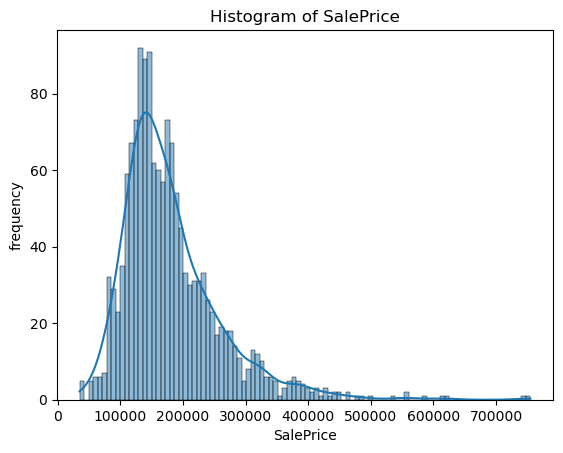

In [25]:
# By using histogram here we can see that the distribution of saleprice
variable=df['SalePrice']
sns.histplot(variable, bins=100, kde=True)
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('frequency')
plt.show()

#### BoxPlot

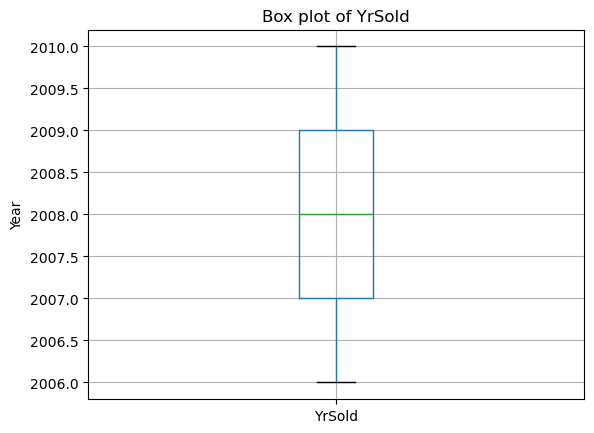

In [26]:
# the distribution of Yrsold
df.boxplot(column=['YrSold'])
plt.title('Box plot of YrSold')
plt.ylabel('Year')
plt.show()

### Step 4.Bivariate Analysis.

#### Line Plot

Text(0.5, 1.0, 'House Price vs YearSold')

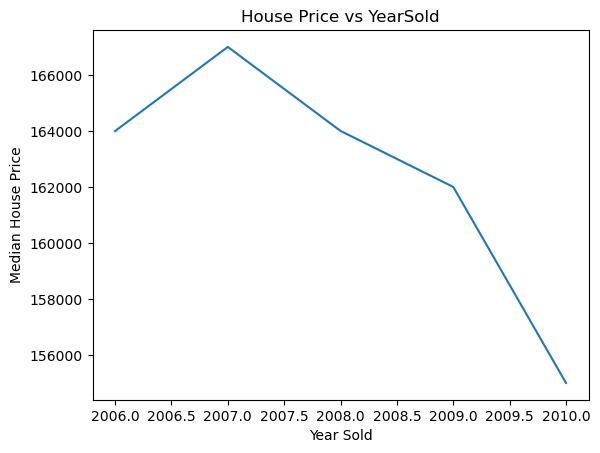

In [27]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

#### Scatterplot

#### We will compare the difference between All years feature with SalePrice 

C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_1232\607180899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature]=df['YrSold']-df[feature]


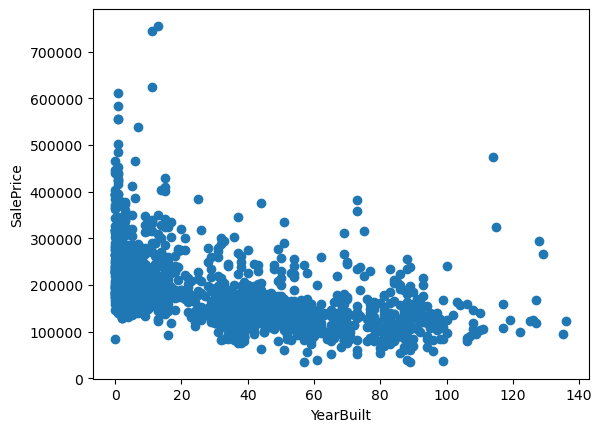

C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_1232\607180899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature]=df['YrSold']-df[feature]


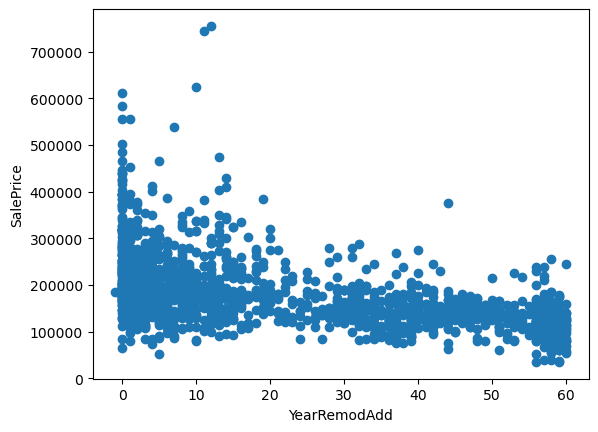

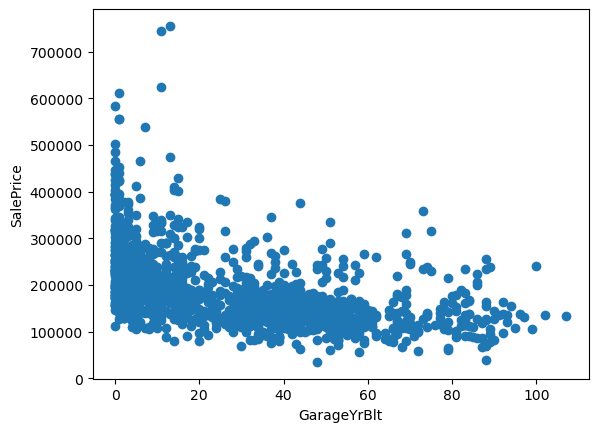

In [28]:

for feature in year_feature:
    if feature!='YrSold':
        # we will capture the difference between year variable and year the housepricing
        df[feature]=df['YrSold']-df[feature]
        
        data=df.copy()
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [29]:
## Numerical variables are usually of 2 type
##  Continous variable and Discrete Variables
numerical_features = df.select_dtypes(include=[np.number])

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 15


['OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

#### Lets Find the relationship between Discrete Variables and SalePrice

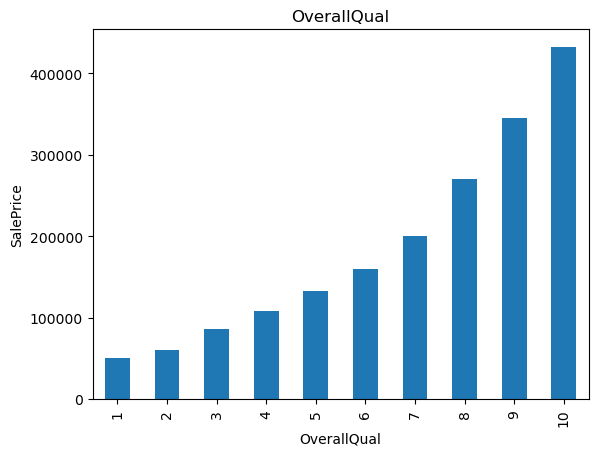

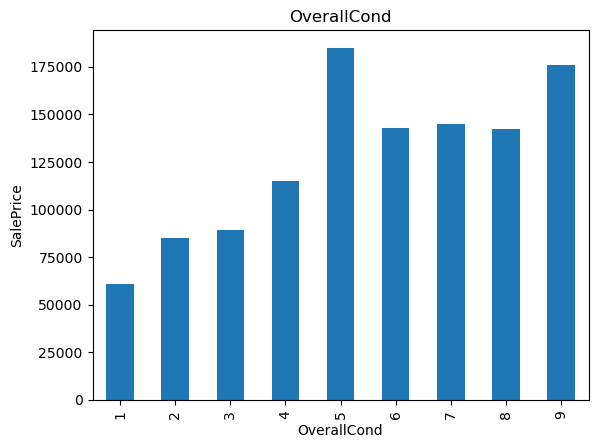

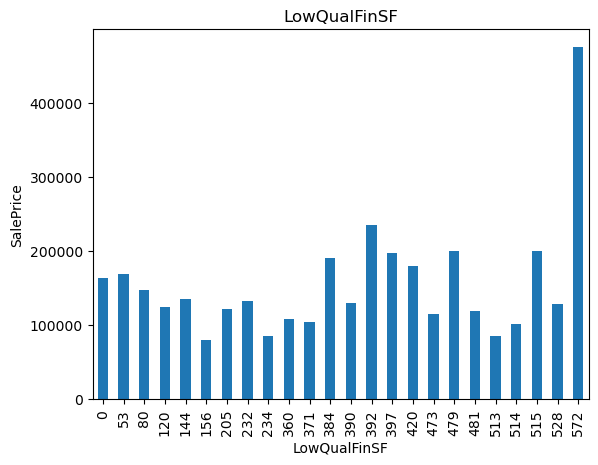

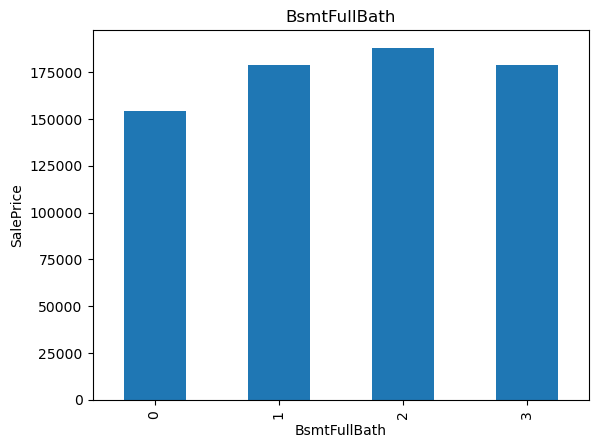

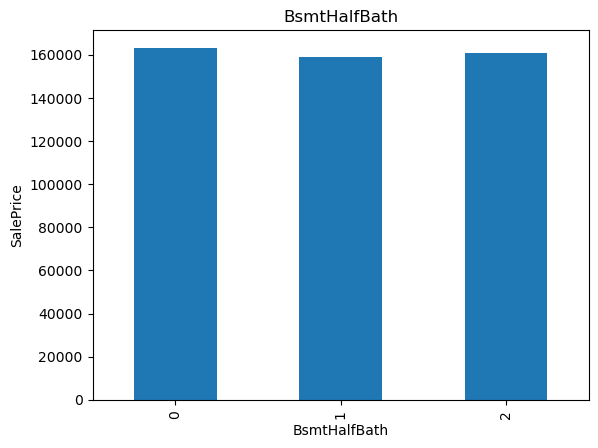

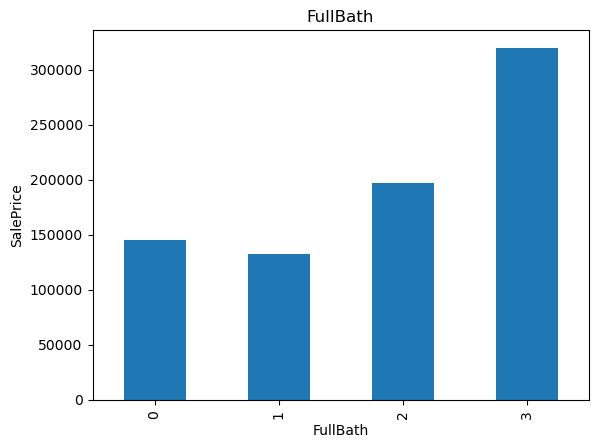

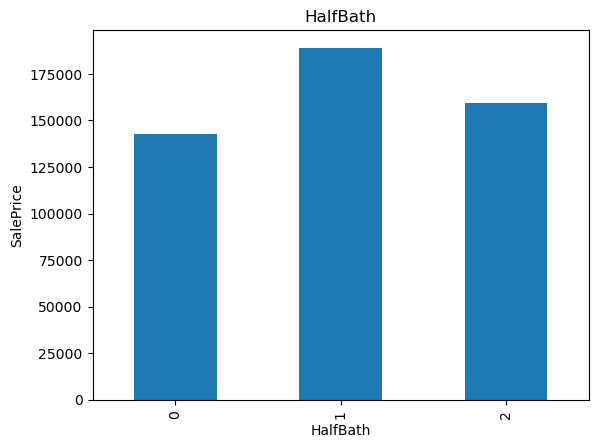

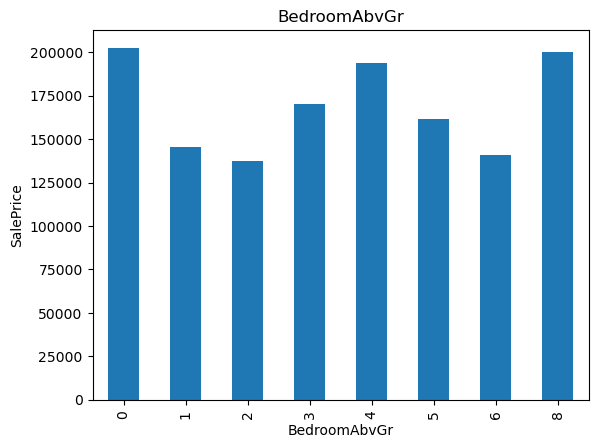

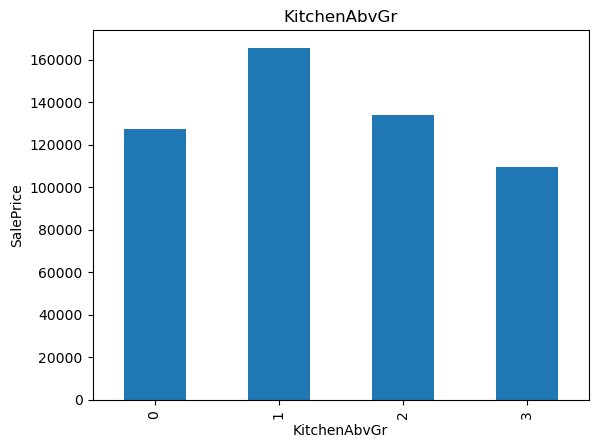

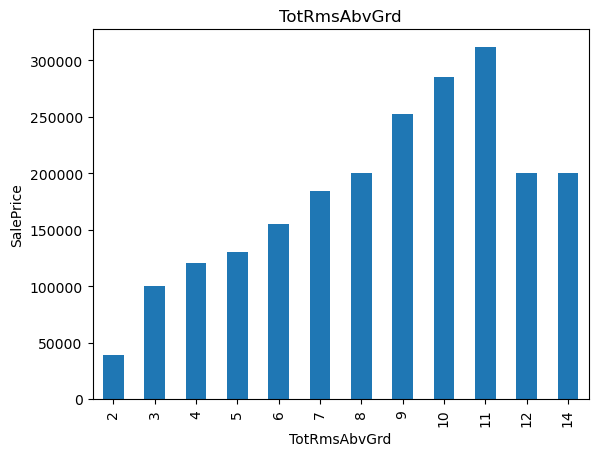

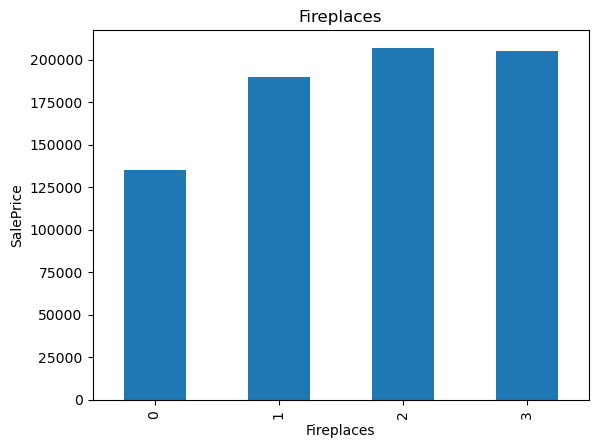

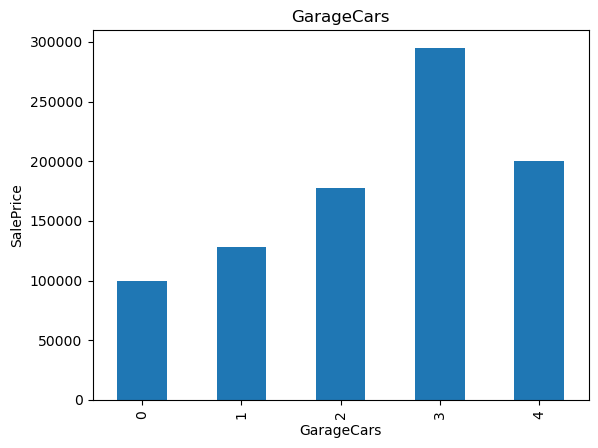

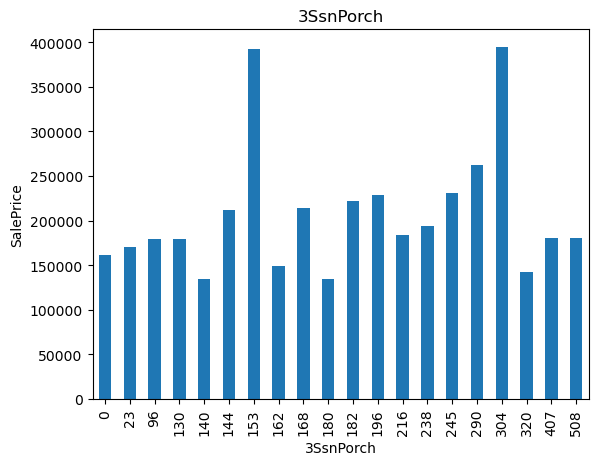

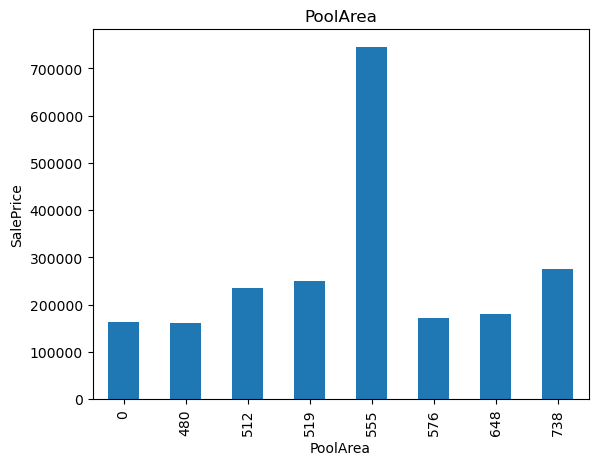

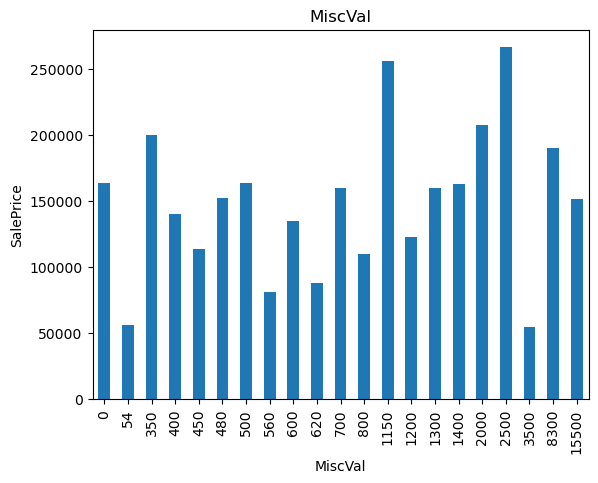

In [30]:

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### There is a relationship between variable number and SalePrice

In [31]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


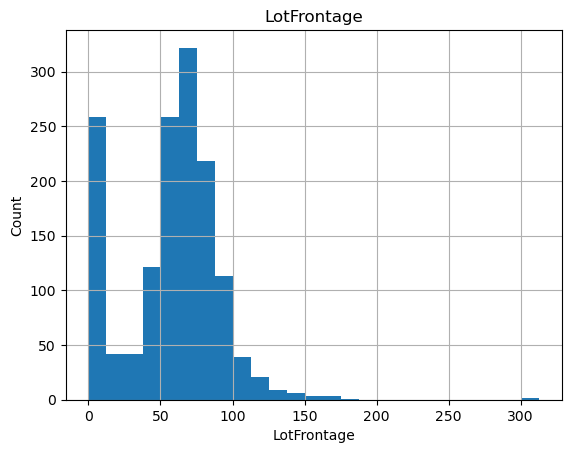

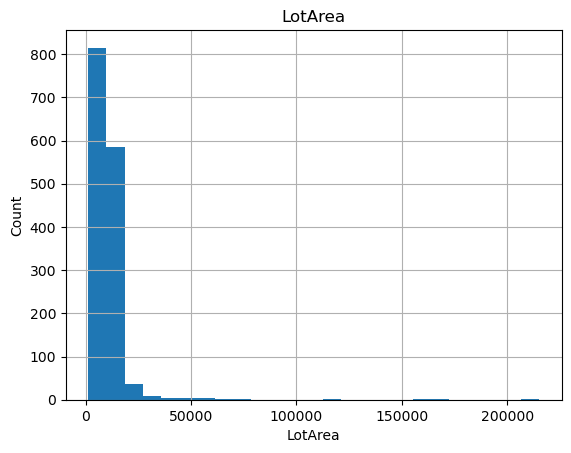

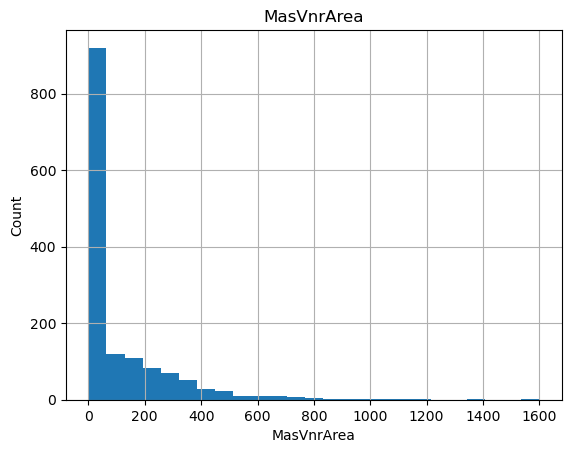

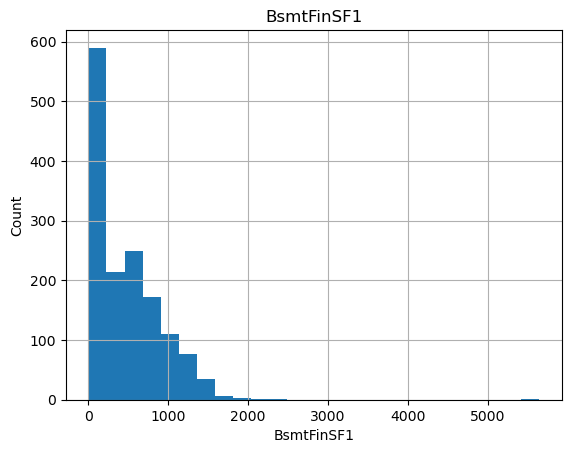

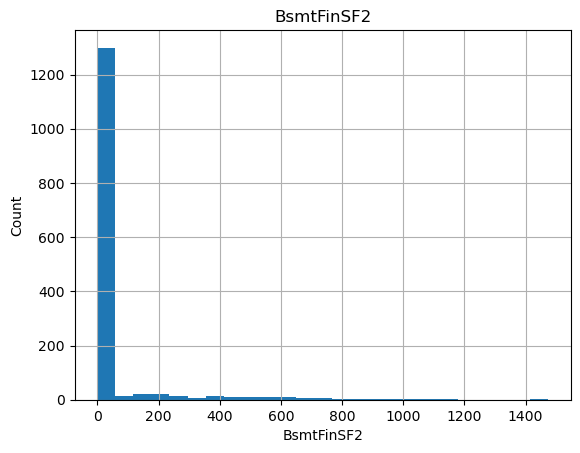

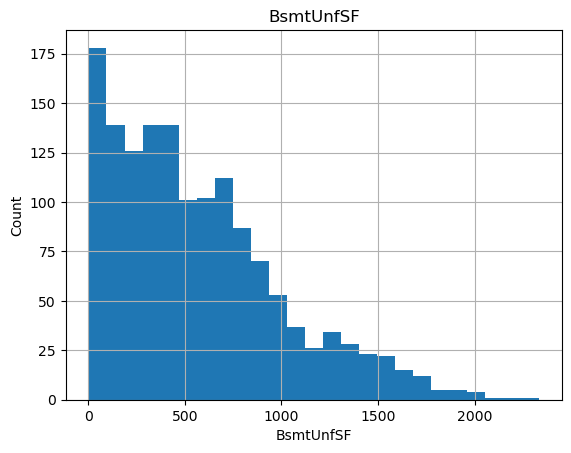

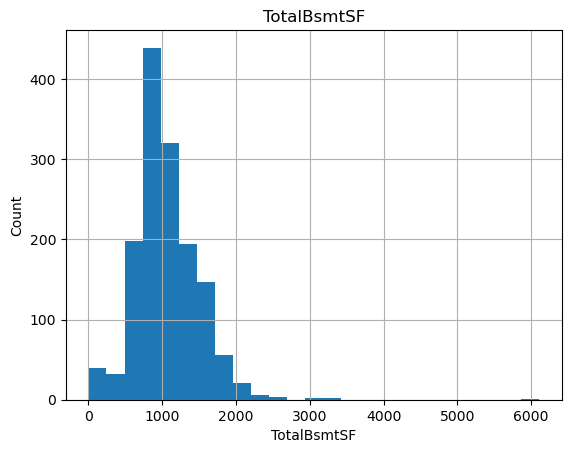

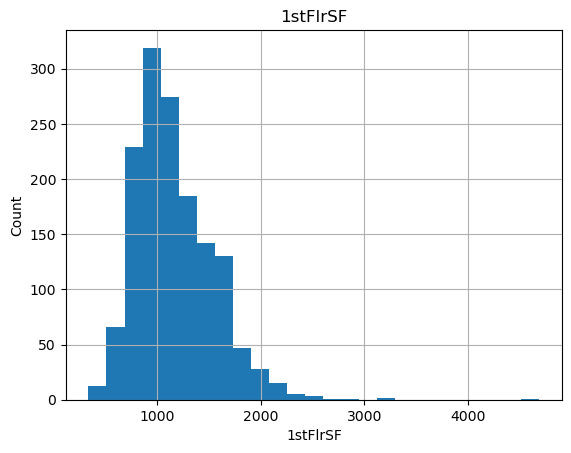

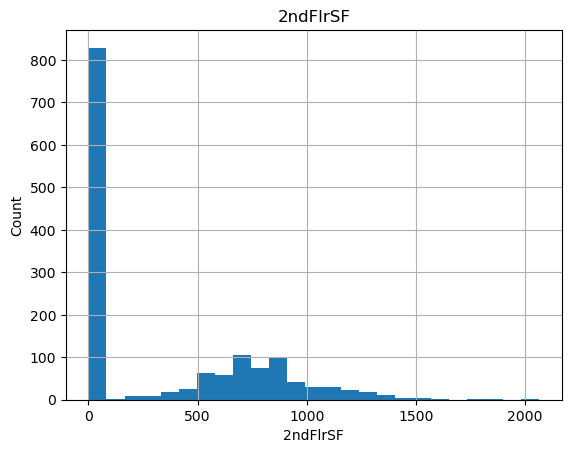

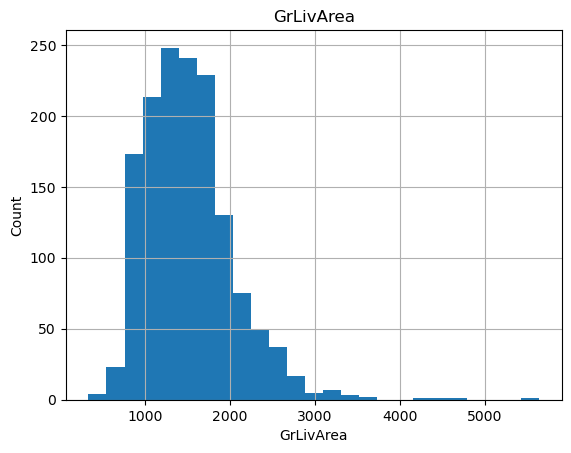

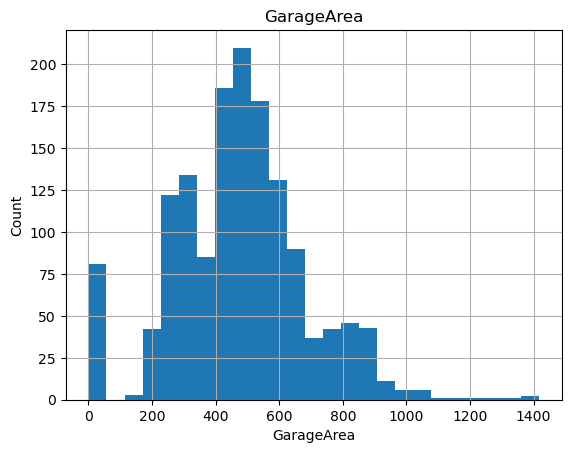

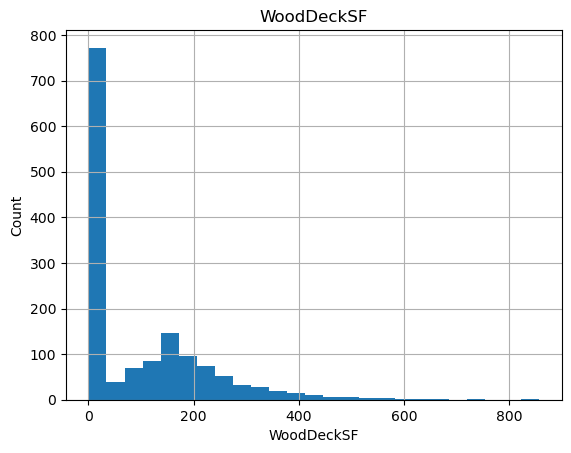

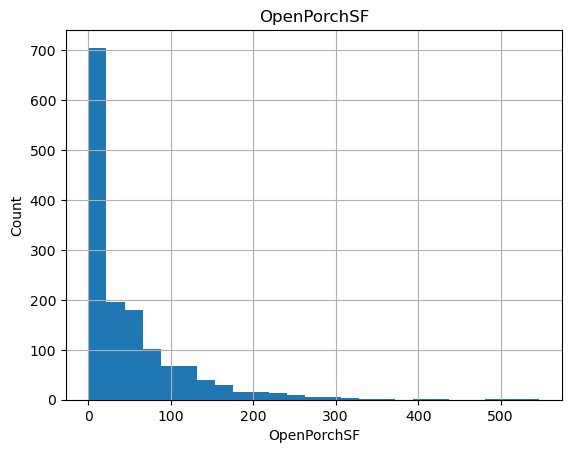

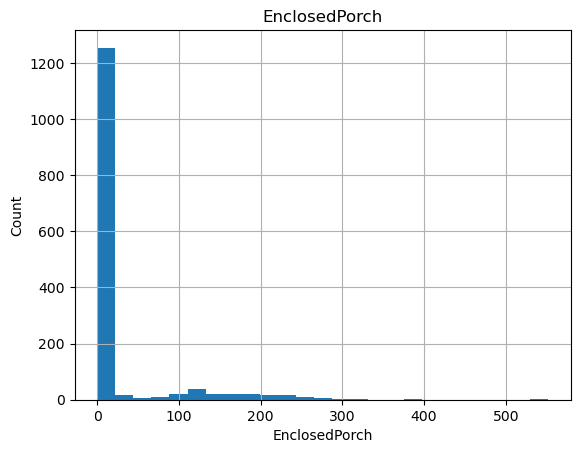

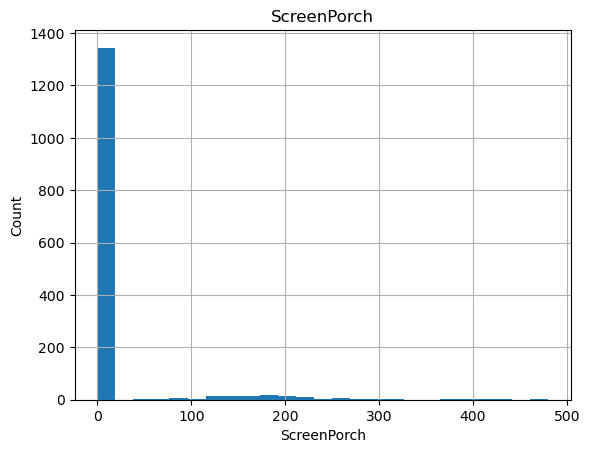

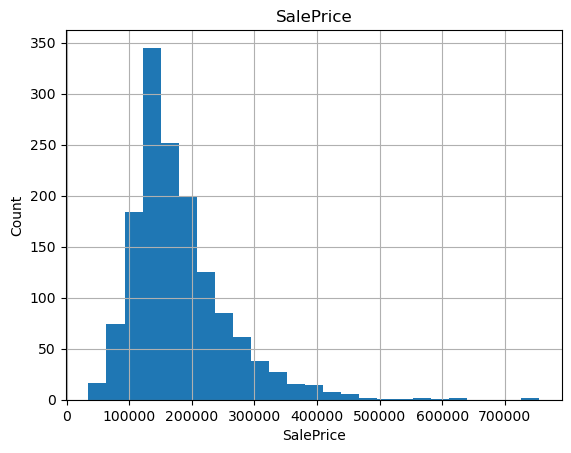

In [32]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

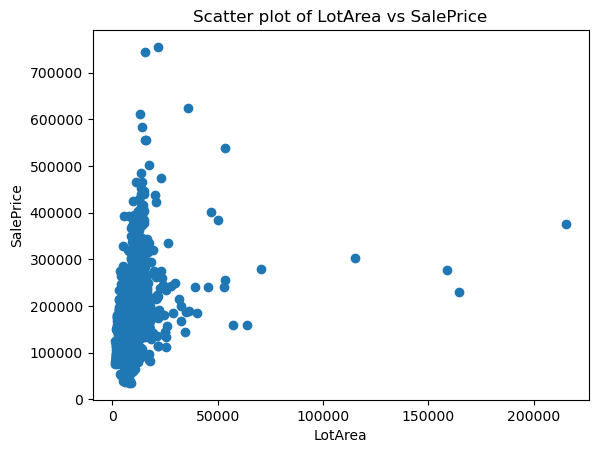

In [33]:
# Here we can find the saleprice as per lotarea
x =df['LotArea']
y =df['SalePrice']

plt.scatter(x,y)
plt.title('Scatter plot of LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

#### Bar chart

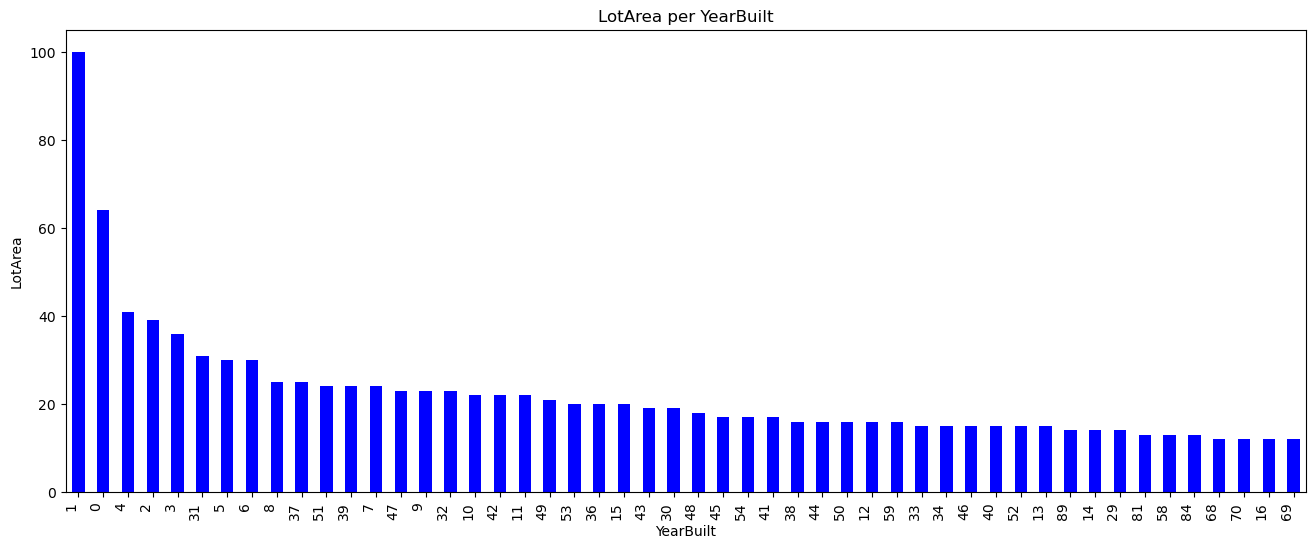

In [34]:
# Lotarea & YearBuilt 
YearBuilt_counts = df['YearBuilt'].value_counts().head(50)
plt.figure(figsize=(16, 6))
YearBuilt_counts.plot(kind='bar', color= 'blue')
plt.title('LotArea per YearBuilt') 
plt.xlabel('YearBuilt')
plt.ylabel('LotArea')
plt.xticks(rotation=90, ha='right') 
plt.show()

In [35]:
#### Now let us find the relationship between these discrete features and Sale Price
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 15


In [36]:
df[discrete_feature].head()

OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0            7            5             0             1             0   
1            6            8             0             0             1   
2            7            5             0             1             0   
3            7            5             0             1             0   
4            8            5             0             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  3SsnPorch  PoolArea  MiscVal  
0           2          0         0        0  
1           2          0         0        0  
2           2          0         0        0  
3           3          0         0        0  
4           3          0         0        0

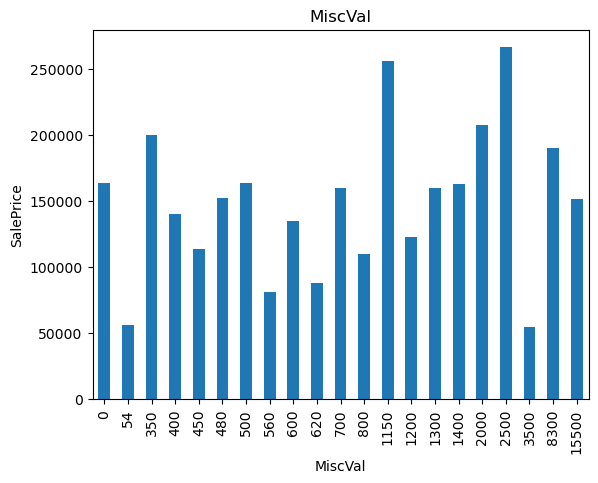

In [37]:
# Saleprice VS MiscVal (Value of miscellaneous feature)
for feature in discrete_feature:
  data=df.copy()
data.groupby(feature)['SalePrice'].median().plot.bar()
plt.xlabel(feature)
plt.ylabel('SalePrice')
plt.title(feature)
plt.show()

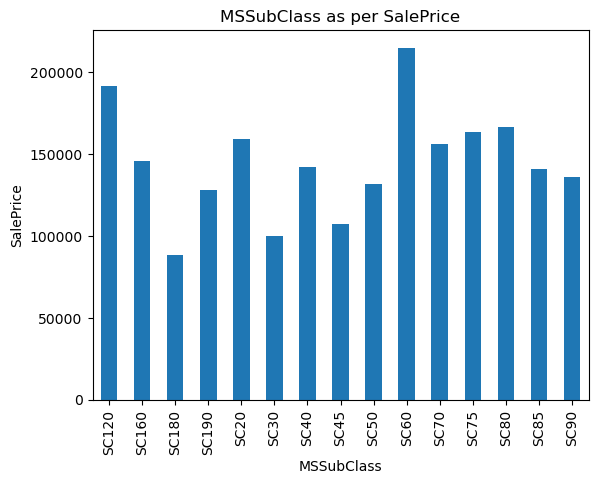

In [38]:
# We can check here a Saleprice ae per MSSubClass
data=df.copy()
data.groupby('MSSubClass')['SalePrice'].median().plot.bar()
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.title('MSSubClass as per SalePrice')
plt.show()

#### Let us analyse the continuous values with data visualisation to understand the data distribution

In [39]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous Feature Count {}".format(len(continuous_feature)))

Continuous Feature Count 16


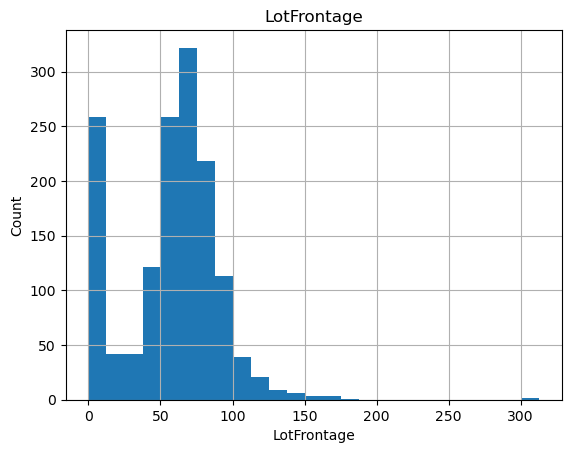

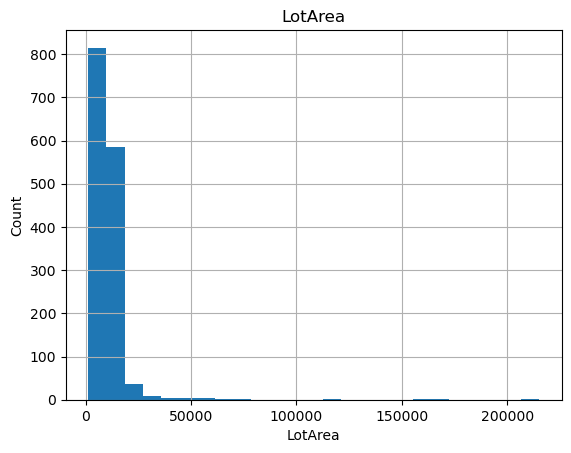

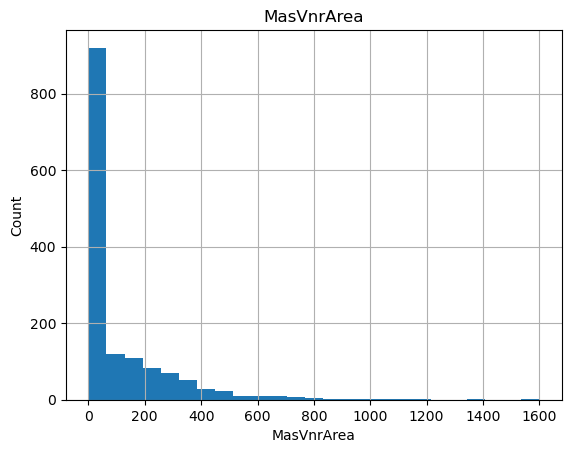

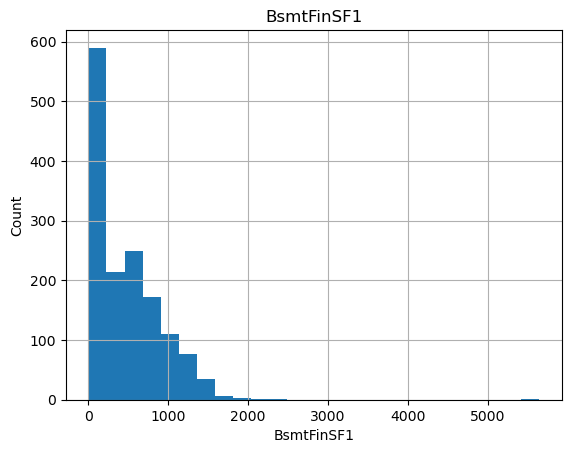

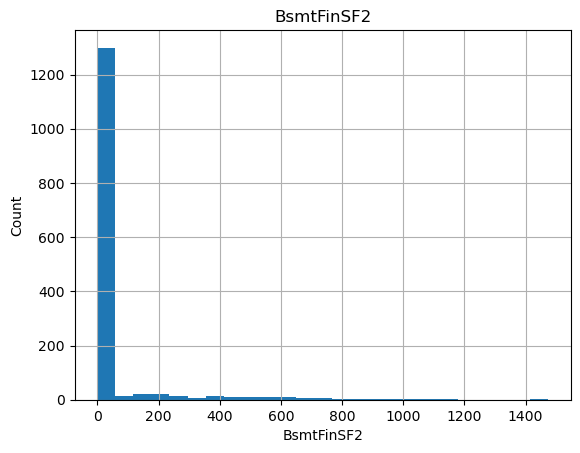

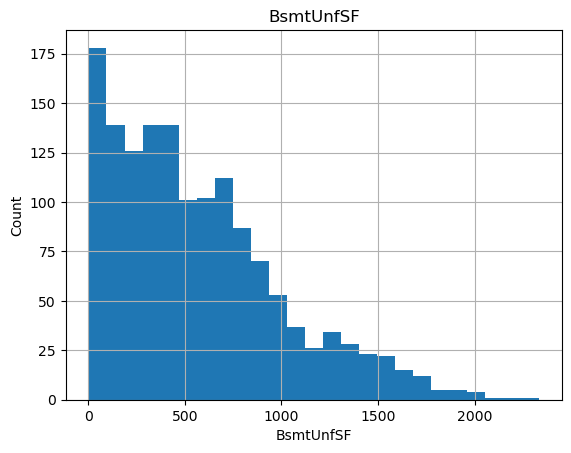

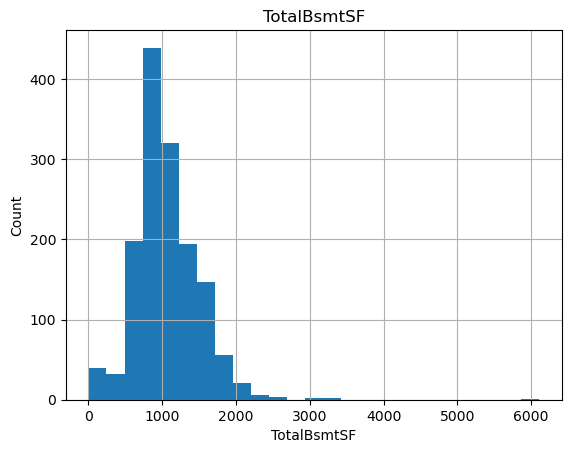

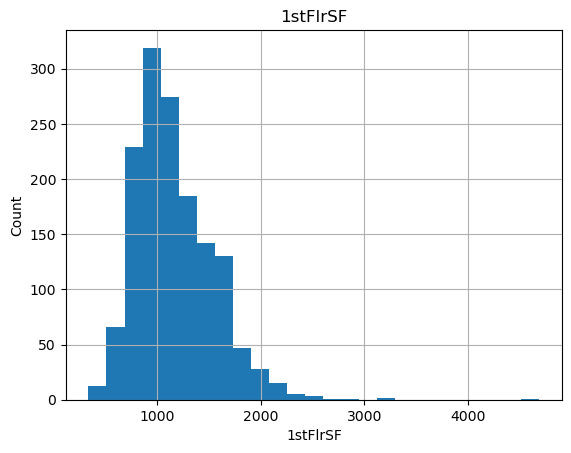

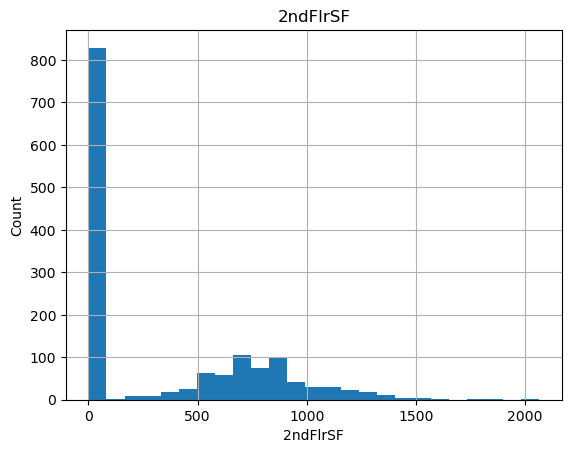

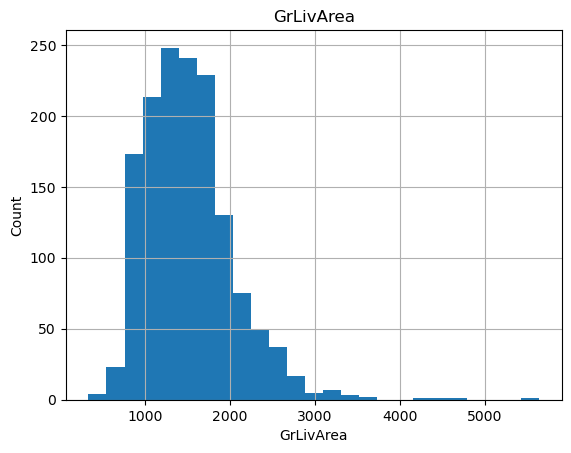

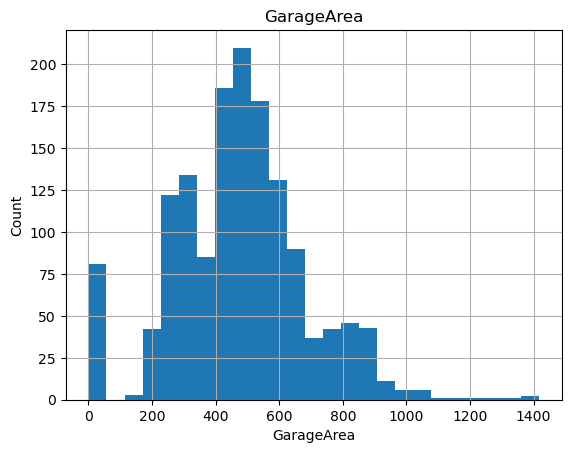

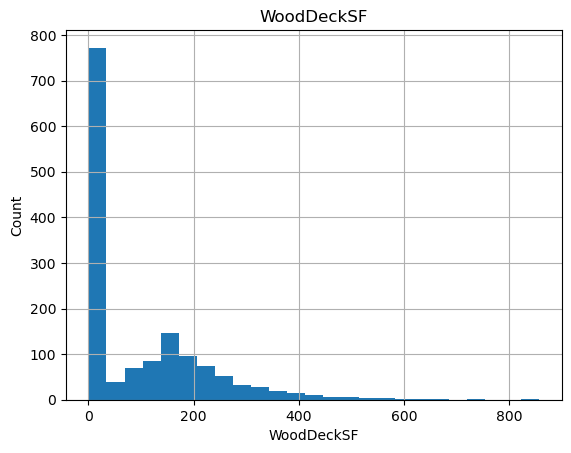

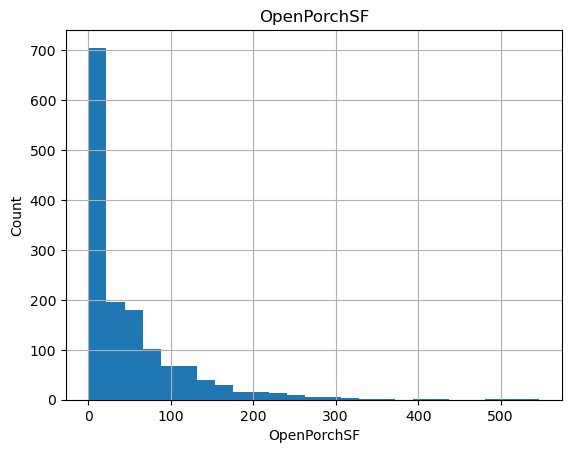

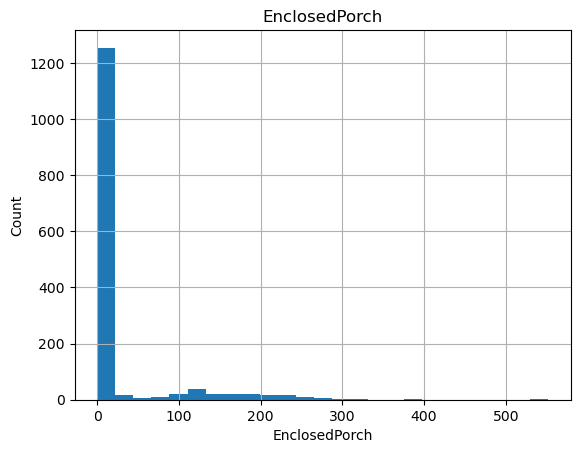

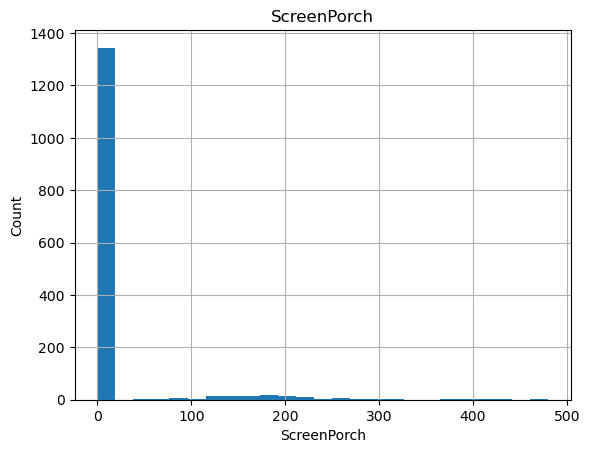

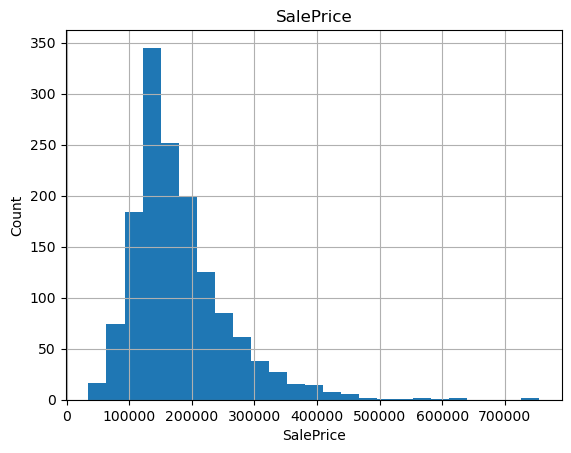

In [40]:
for feature in continuous_feature:
 data=df.copy()
 data[feature].hist(bins=25)
 plt.xlabel(feature)
 plt.ylabel("Count")
 plt.title(feature)
 plt.show()

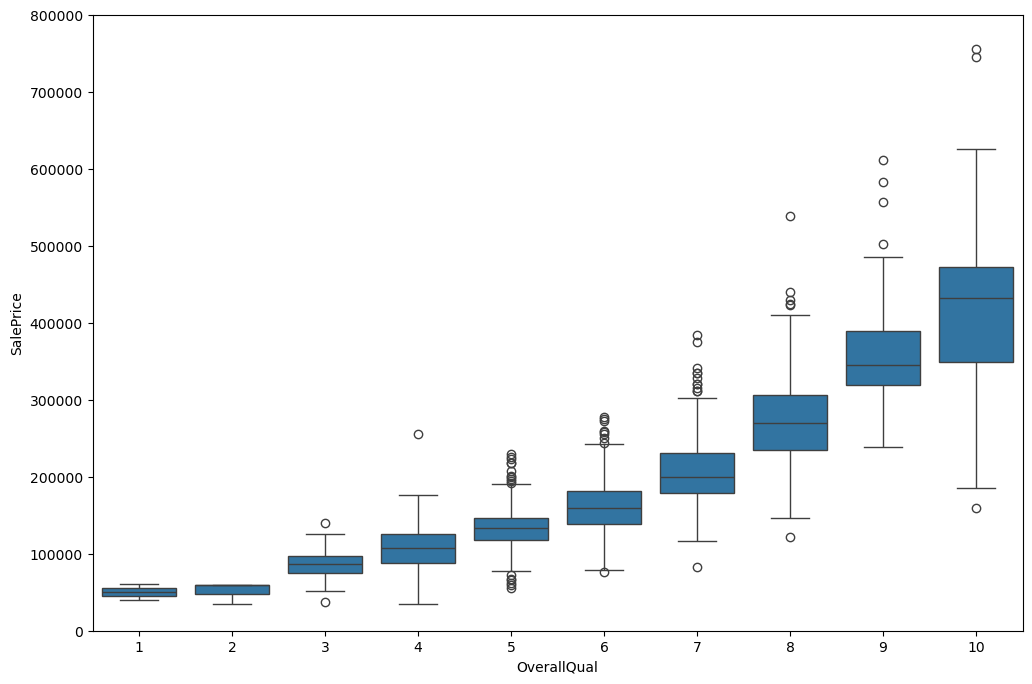

In [41]:
# Saleprice as per the OverallQual feature
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

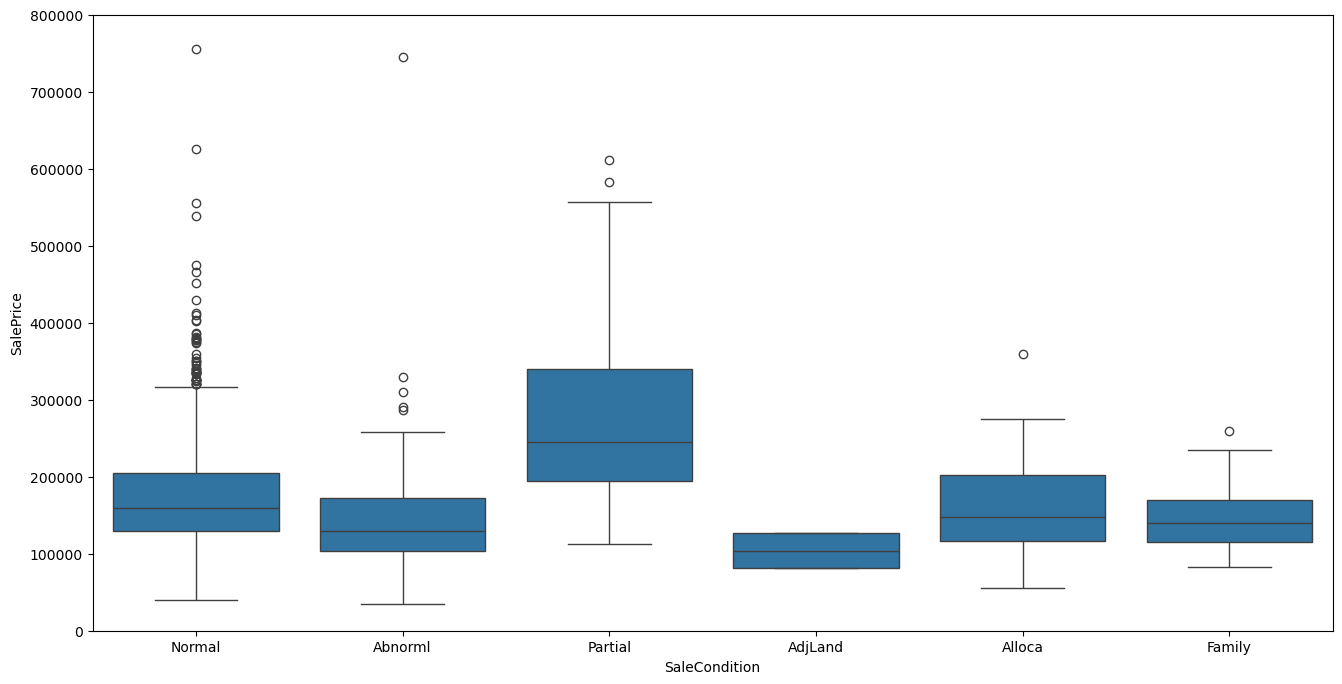

In [42]:
# SalePrice & Condition
var = 'SaleCondition'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=0)

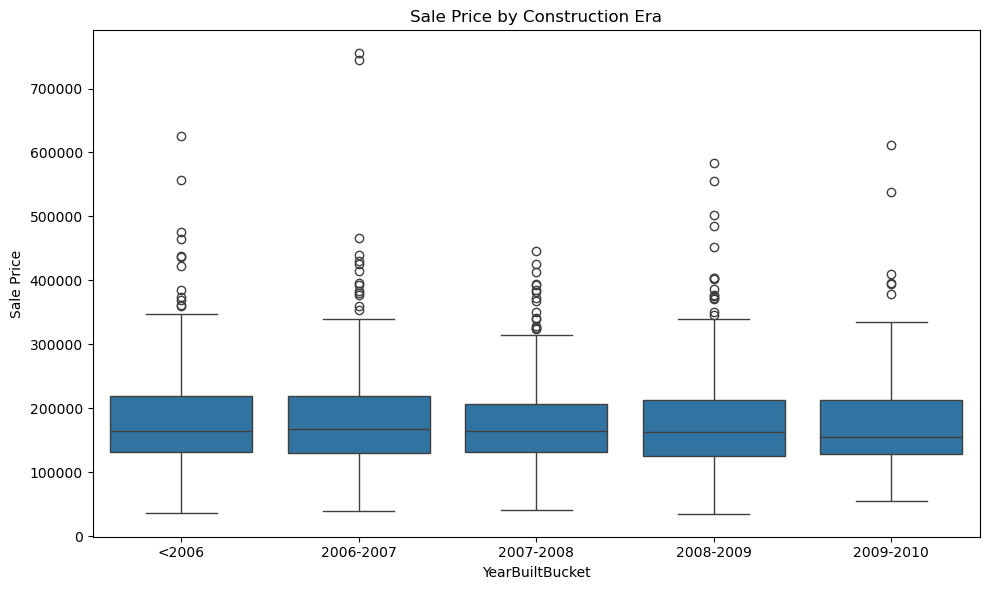

In [43]:
df['YearBuiltBucket'] = pd.cut(df['YrSold'], bins=[2005,2006,2007,2008,2009,2010],
                              labels=['<2006','2006-2007','2007-2008','2008-2009','2009-2010'])

plt.figure(figsize=(10,6))
sns.boxplot(x='YearBuiltBucket', y='SalePrice', data=df)
plt.title('Sale Price by Construction Era')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

### Step 5.Multivariate Analysis.

#### Correlation Heat Map

<Axes: >

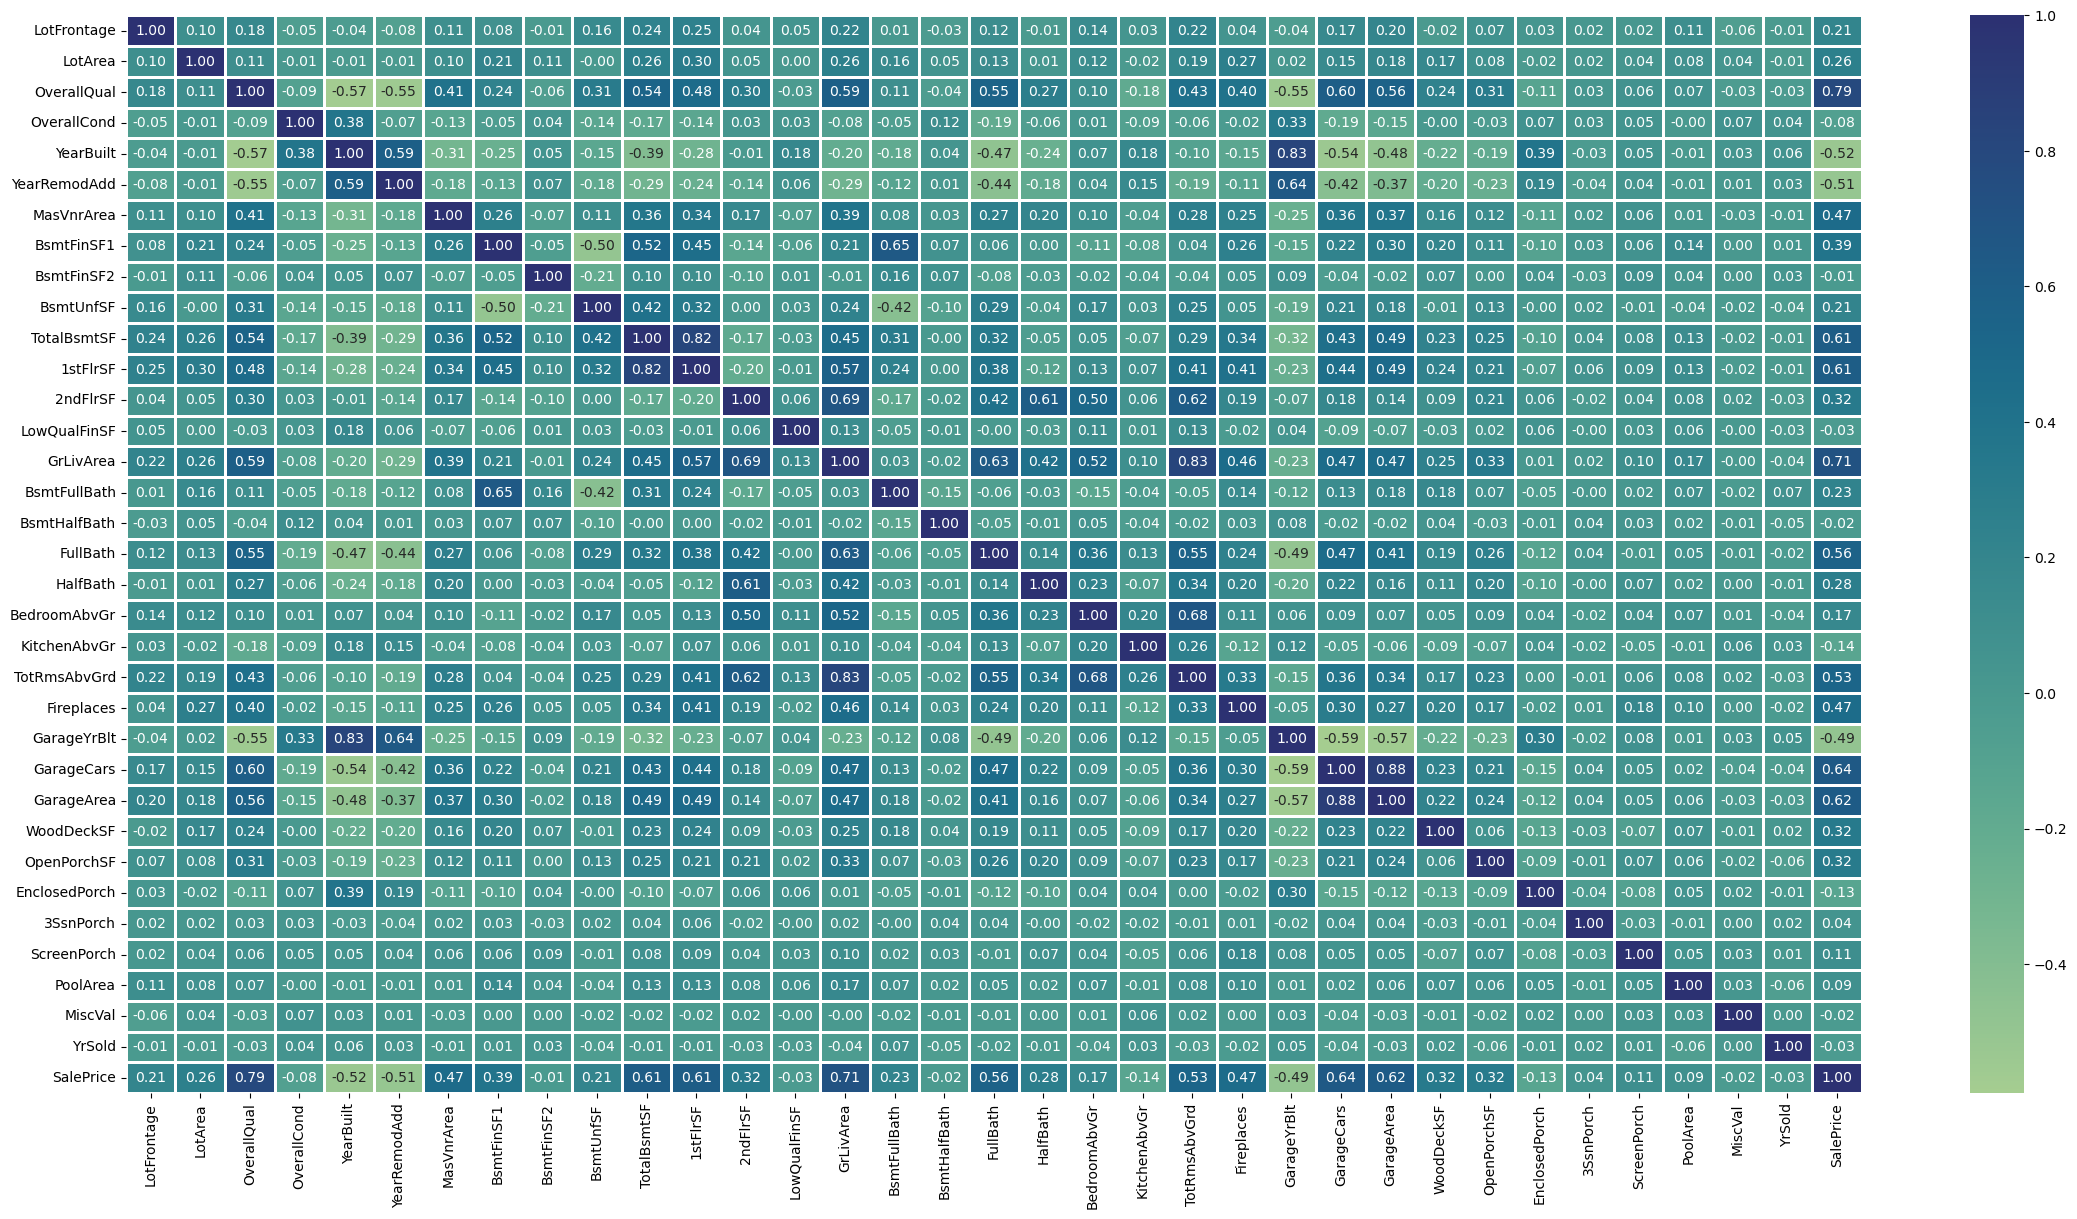

In [44]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(28, 14))
sns.heatmap(numerical_df.corr(),
            cmap ='crest',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

#### Pair plot

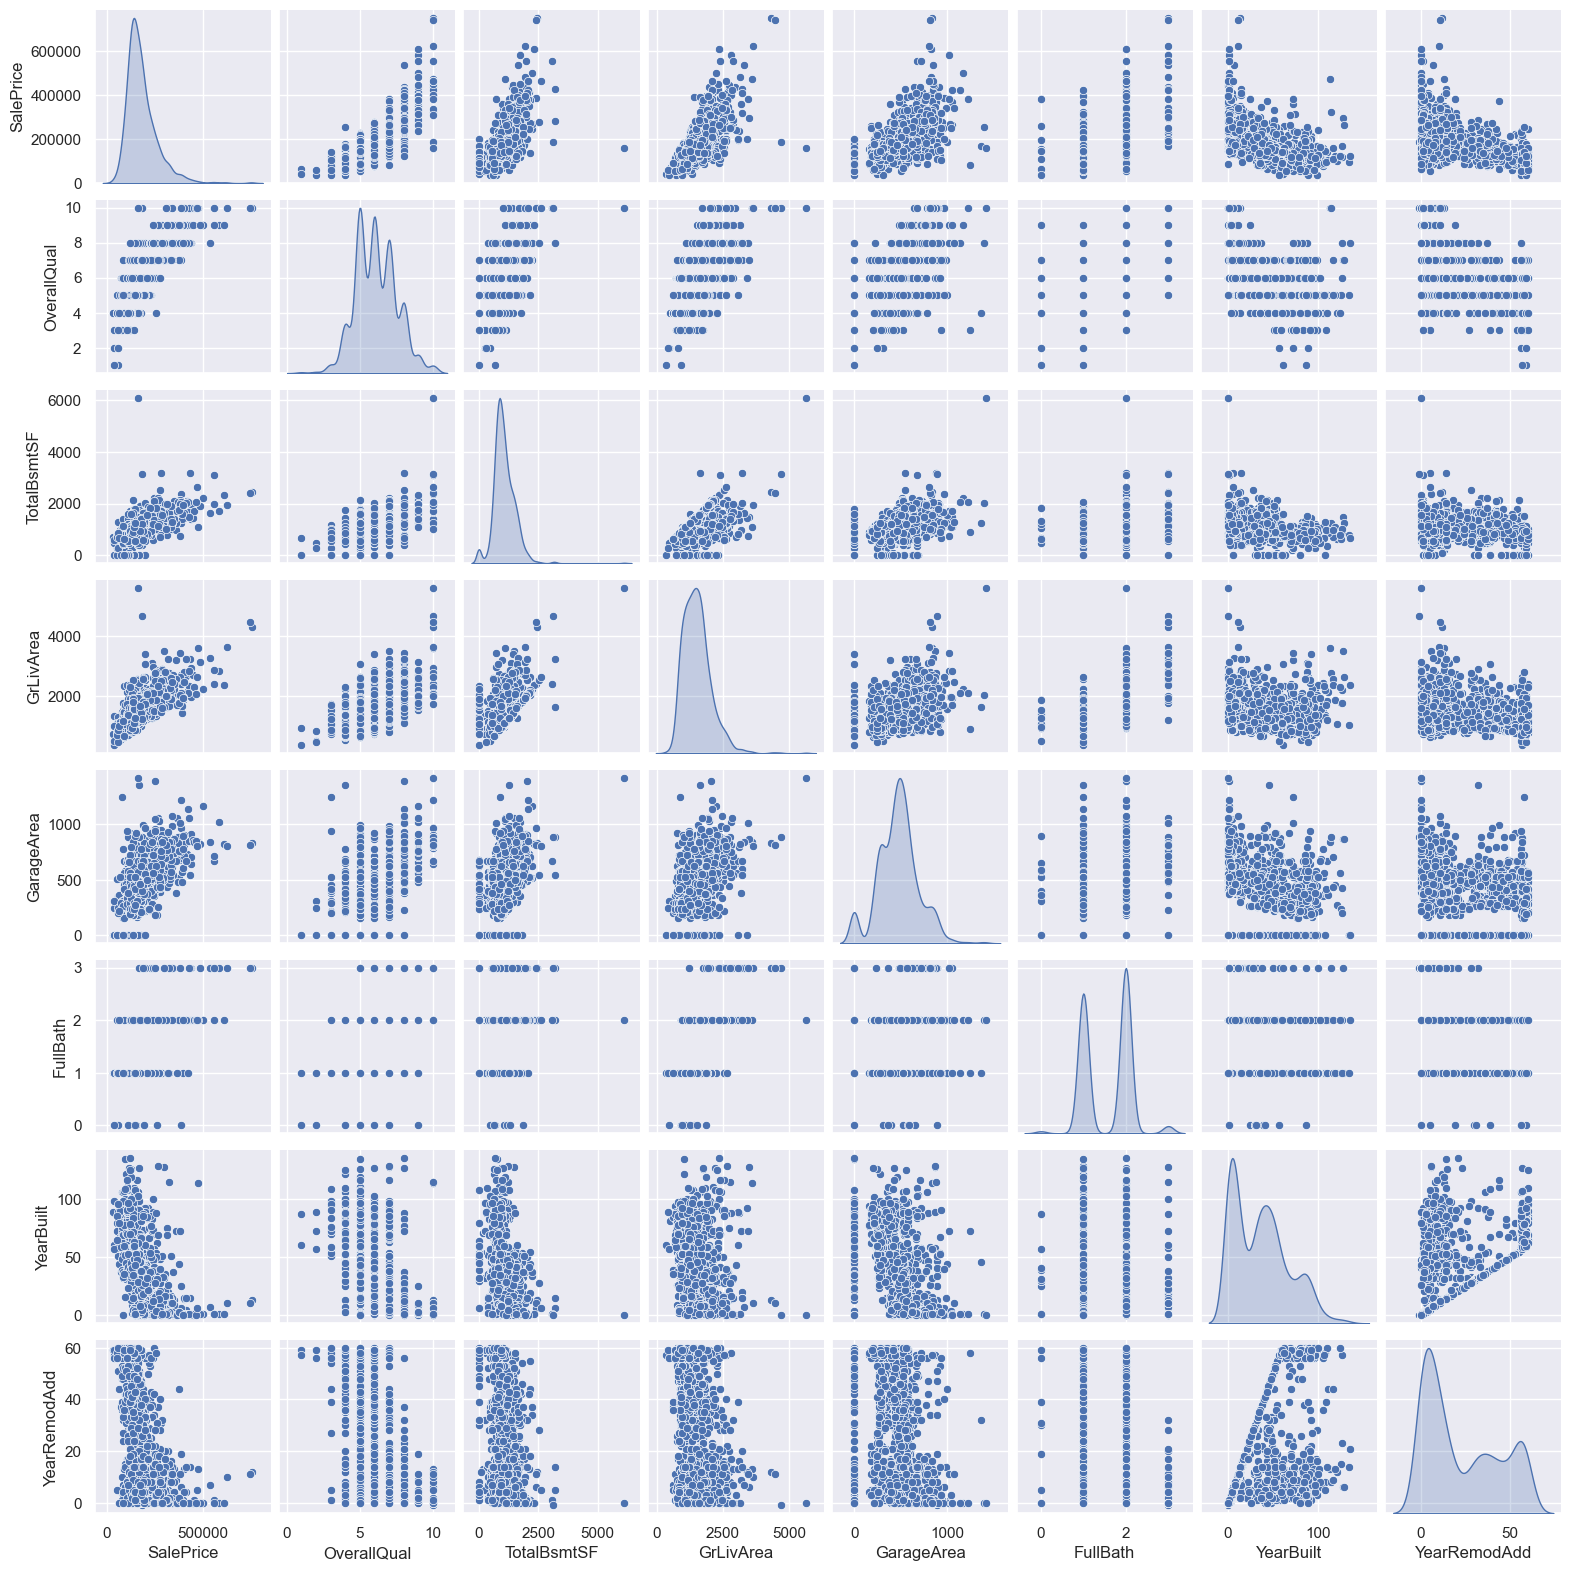

In [45]:
# Pair Plot between 'SalePrice' and correlated variables
# Visualisation of 'OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd' features with respect to SalePrice
#in the form of pair plot & scatter pair plot for better understanding.

sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(df[columns],height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

### Step 6 :Feature Engineering

In [46]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0       SC60       RL           65     8450   Pave   NaN      Reg         Lvl   
1       SC20       RL           80     9600   Pave   NaN      Reg         Lvl   
2       SC60       RL           68    11250   Pave   NaN      IR1         Lvl   
3       SC70       RL           60     9550   Pave   NaN      IR1         Lvl   
4       SC60       RL           84    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace         196        Gd        TA   
1  CompShg     MetalSd     MetalSd        NaN           0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace         162        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng        NaN           0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace         350        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          No     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd

#### Missing Values

In [47]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.5973% missing values


In [48]:
## Replace missing value with a new label
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

Alley         0
MasVnrType    0
dtype: int64

In [49]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0       SC60       RL           65     8450   Pave  Missing      Reg   
1       SC20       RL           80     9600   Pave  Missing      Reg   
2       SC60       RL           68    11250   Pave  Missing      IR1   
3       SC70       RL           60     9550   Pave  Missing      IR1   
4       SC60       RL           84    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd    Missing   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         196        Gd        TA      PConc       Gd       TA           No   
1           0        TA        TA     CBlock       Gd       TA           Gd   
2         162        Gd        TA      PConc       Gd       TA           Mn   
3           0        TA        TA     BrkTil       TA       Gd           No   
4         350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          No   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        T

In [50]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

GarageYrBlt: 0.0555% missing value


In [51]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using mean since there are outliers
    mean_value=df[feature].mean()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(mean_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()
    

C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_1232\1775039074.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(mean_value,inplace=True)


GarageYrBlt    0
dtype: int64

In [52]:
df.head(50)

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0        SC60       RL           65     8450   Pave  Missing      Reg   
1        SC20       RL           80     9600   Pave  Missing      Reg   
2        SC60       RL           68    11250   Pave  Missing      IR1   
3        SC70       RL           60     9550   Pave  Missing      IR1   
4        SC60       RL           84    14260   Pave  Missing      IR1   
5        SC50       RL           85    14115   Pave  Missing      IR1   
6        SC20       RL           75    10084   Pave  Missing      Reg   
7        SC60       RL            0    10382   Pave  Missing      IR1   
8        SC50       RM           51     6120   Pave  Missing      Reg   
9       SC190       RL           50     7420   Pave  Missing      Reg   
10       SC20       RL           70    11200   Pave  Missing      Reg   
11       SC60       RL           85    11924   Pave  Missing      IR1   
12       SC20       RL            0    12968   Pave  Missing      IR2   
13       SC20       RL           91    10652   Pave  Missing      IR1   
14       SC20       RL            0    10920   Pave  Missing      IR1   
15       SC45       RM           51     6120   Pave  Missing      Reg   
16       SC20       RL            0    11241   Pave  Missing      IR1   
17       SC90       RL           72    10791   Pave  Missing      Reg   
18       SC20       RL           66    13695   Pave  Missing      Reg   
19       SC20       RL           70     7560   Pave  Missing      Reg   
20       SC60       RL          101    14215   Pave  Missing      IR1   
21       SC45       RM           57     7449   Pave     Grvl      Reg   
22       SC20       RL           75     9742   Pave  Missing      Reg   
23      SC120       RM           44     4224   Pave  Missing      Reg   
24       SC20       RL            0     8246   Pave  Missing      IR1   
25       SC20       RL          110    14230   Pave  Missing      Reg   
26       SC20       RL           60     7200   Pave  Missing      Reg   
27       SC20       RL           98    11478   Pave  Missing      Reg   
28       SC20       RL           47    16321   Pave  Missing      IR1   
29       SC30       RM           60     6324   Pave  Missing      IR1   
30       SC70  C (all)           50     8500   Pave     Pave      Reg   
31       SC20       RL            0     8544   Pave  Missing      IR1   
32       SC20       RL           85    11049   Pave  Missing      Reg   
33       SC20       RL           70    10552   Pave  Missing      IR1   
34      SC120       RL           60     7313   Pave  Missing      Reg   
35       SC60       RL          108    13418   Pave  Missing      Reg   
36       SC20       RL          112    10859   Pave  Missing      Reg   
37       SC20       RL           74     8532   Pave  Missing      Reg   
38       SC20       RL           68     7922   Pave  Missing      Reg   
39       SC90       RL           65     6040   Pave  Missing      Reg   
40       SC20       RL           84     8658   Pave  Missing      Reg   
41       SC20       RL          115    16905   Pave  Missing      Reg   
42       SC85       RL            0     9180   Pave  Missing      IR1   
43       SC20       RL            0     9200   Pave  Missing      IR1   
44       SC20       RL           70     7945   Pave  Missing      Reg   
45      SC120       RL           61     7658   Pave  Missing      Reg   
46       SC50       RL           48    12822   Pave  Missing      IR1   
47       SC20       FV           84    11096   Pave  Missing      Reg   
48      SC190       RM           33     4456   Pave  Missing      Reg   
49       SC20       RL           66     7742   Pave  Missing      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr      

In [53]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[feature]=df['YrSold']-df[feature]

In [54]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0       SC60       RL           65     8450   Pave  Missing      Reg   
1       SC20       RL           80     9600   Pave  Missing      Reg   
2       SC60       RL           68    11250   Pave  Missing      IR1   
3       SC70       RL           60     9550   Pave  Missing      IR1   
4       SC60       RL           84    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         196        Gd        TA      PConc       Gd       TA           No   
1           0        TA        TA     CBlock       Gd       TA           Gd   
2         162        Gd        TA      PConc       Gd       TA           Mn   
3           0        TA        TA     BrkTil       TA       Gd           No   
4         350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          No   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        T

In [55]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0       2003          2003       2003.0
1       1976          1976       1976.0
2       2001          2002       2001.0
3       1915          1970       1998.0
4       2000          2000       2000.0

In [56]:
# handle Categorical features which are missing
## Replace missing value with a new label
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

Series([], dtype: float64)

In [57]:
## Replacing the numerical Missing Values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in numerical_with_nan:
    ## We will replace by using mean since there are outliers
    mean_value=df[feature].mean()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(mean_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

Series([], dtype: float64)

In [58]:
agg_dict = {
    'SalePrice': ['mean'],     
    'SalePrice': ['mean']      
}
result = df.groupby('YrSold').agg(agg_dict).reset_index().astype(int)
print(result)

  YrSold SalePrice
              mean
0   2006    182549
1   2007    186063
2   2008    177360
3   2009    179432
4   2010    177393


In [59]:
# Using Groupby function 
df.groupby("YrSold")["SalePrice"].mean().sort_values(ascending = False).astype(int)

YrSold
2007    186063
2006    182549
2009    179432
2010    177393
2008    177360
Name: SalePrice, dtype: int32

In [60]:
# Count check from Sale year with aggrigate function
df.YrSold = df.YrSold.apply(lambda x: x)

YrSold_stats = df.groupby('YrSold')['YrSold'].agg('count')
YrSold_stats

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

In [61]:
df.groupby(["HalfBath","FullBath"])["BedroomAbvGr"].mean().sort_values(ascending = False).astype(int)

HalfBath  FullBath
2         2           4
          1           4
0         3           3
1         3           3
          2           3
0         2           2
1         1           2
0         1           2
2         0           1
0         0           0
1         0           0
Name: BedroomAbvGr, dtype: int32

In [62]:
df.groupby("BsmtFinSF1")["BsmtFinSF2"].mean().sort_values(ascending = False).astype(int)

BsmtFinSF1
306     1085
429     1080
437     1057
125     1031
49      1029
        ... 
559        0
556        0
554        0
552        0
5644       0
Name: BsmtFinSF2, Length: 637, dtype: int32

In [63]:
df.groupby(["1stFlrSF","2ndFlrSF"])["SalePrice"].mean().sort_values(ascending = False).astype(int)

1stFlrSF  2ndFlrSF
2444      1872        755000
2411      2065        745000
1831      1796        625000
2364      0           611657
1734      1088        582933
                       ...  
729       0            52000
649       668          40000
334       0            39300
600       368          37900
480       0            35311
Name: SalePrice, Length: 1118, dtype: int32

### Step 7:Feature Engineering and Size Impact

#### Feature engineering significantly impacts model size and performance. Effective feature engineering can reduce the number of features, leading to smaller, more efficient models. In summary, feature engineering is a critical step in the pipeline that can significantly impact both the size and performance of models.

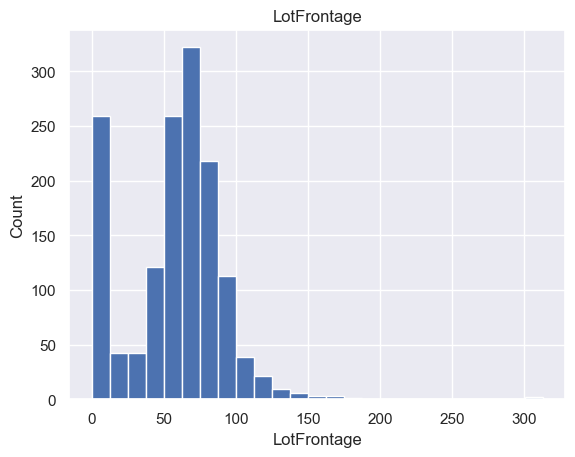

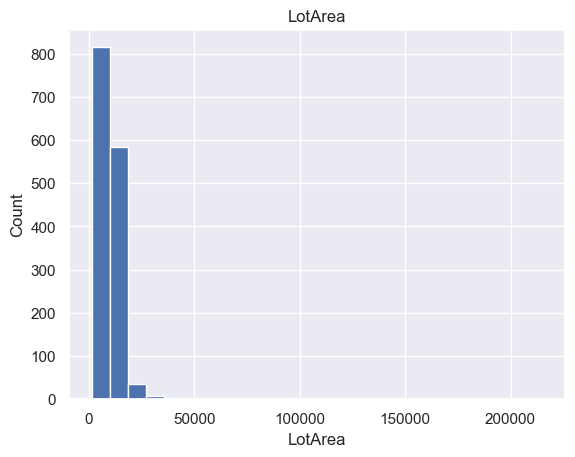

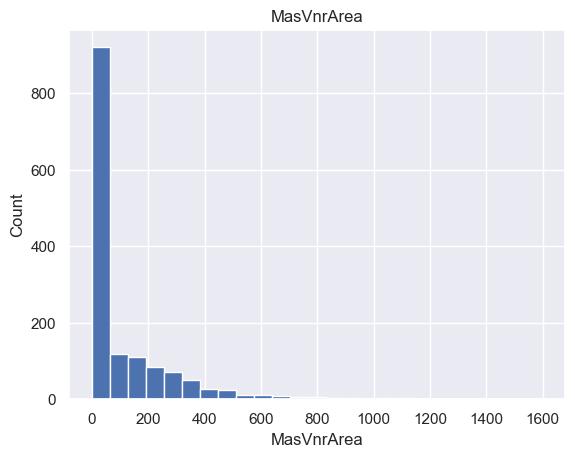

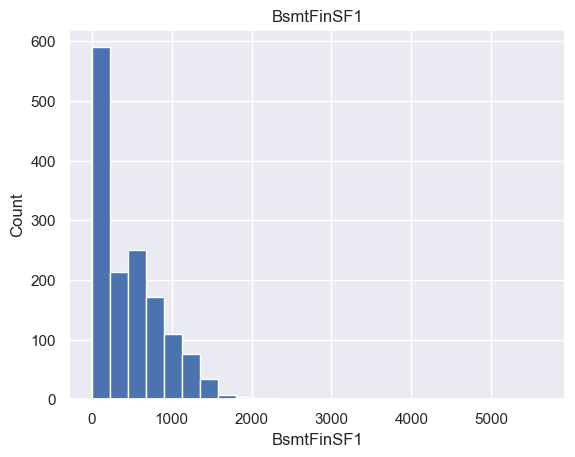

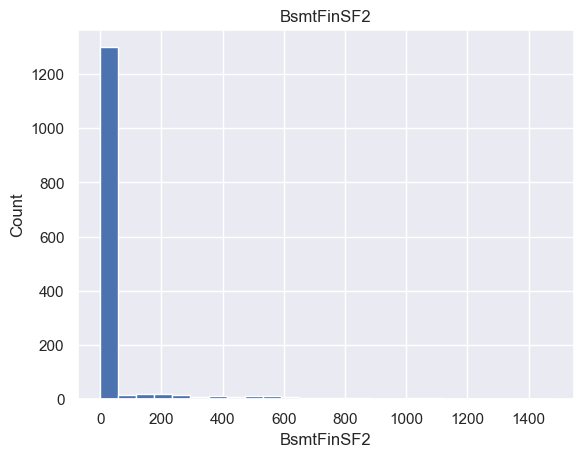

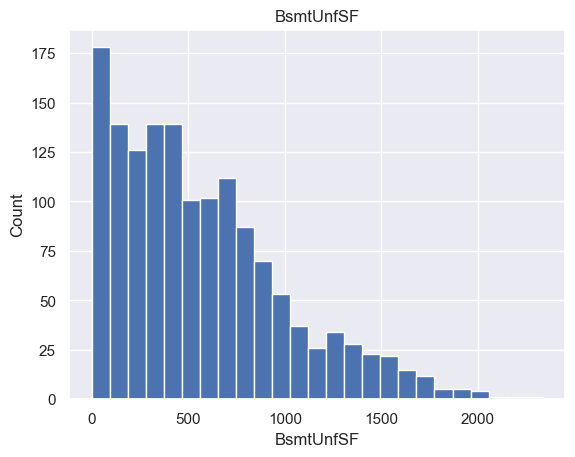

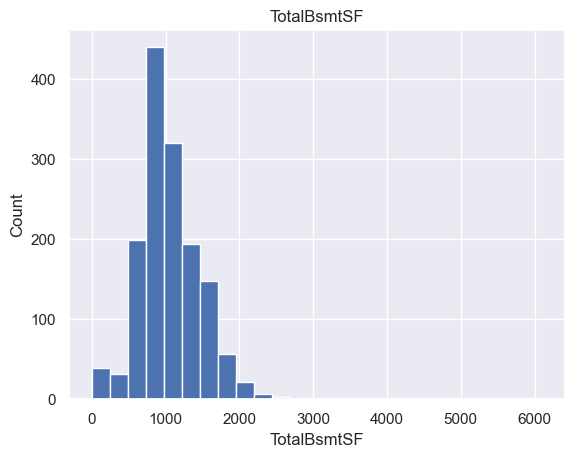

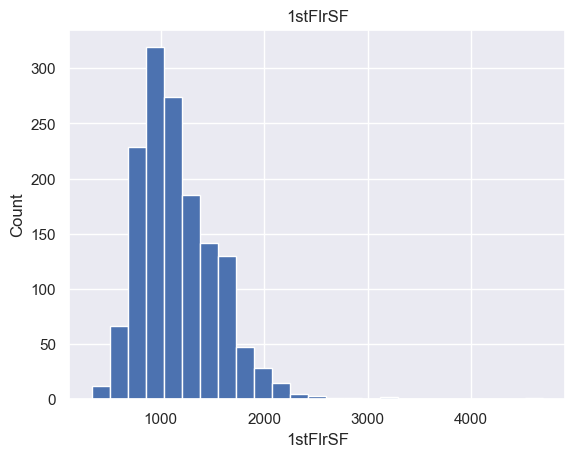

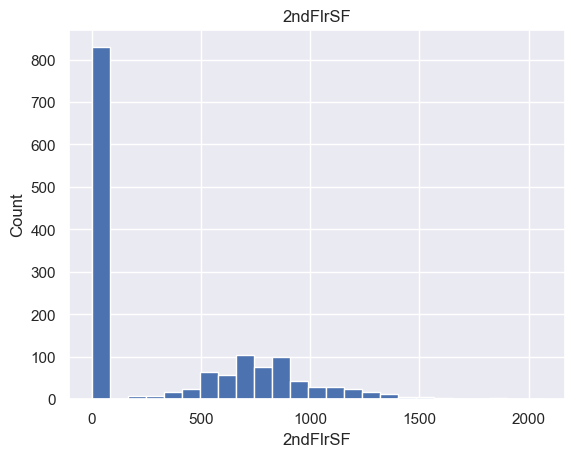

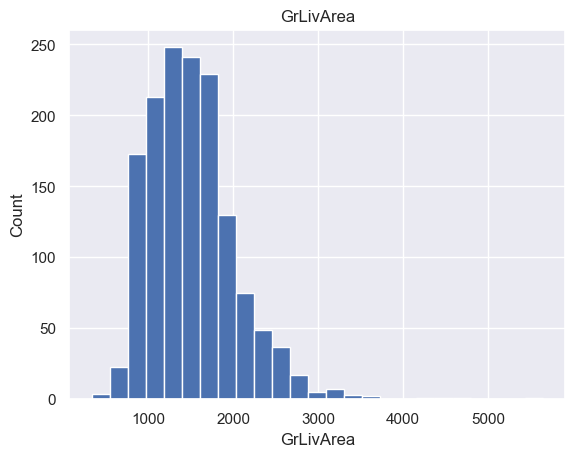

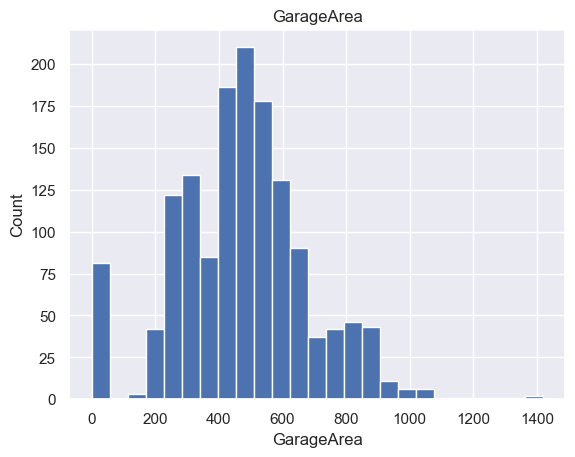

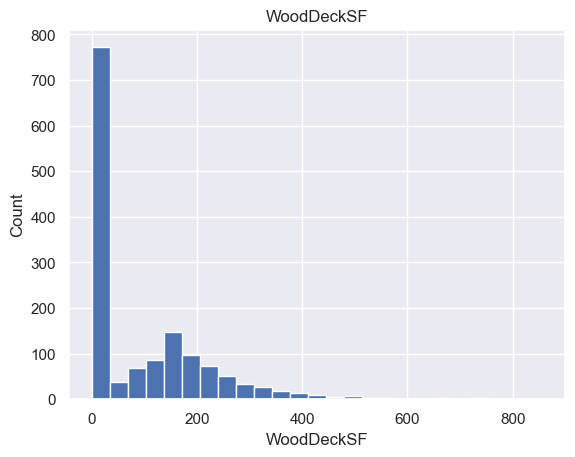

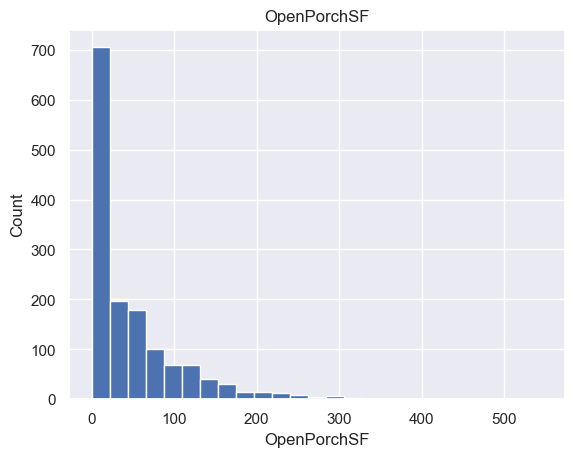

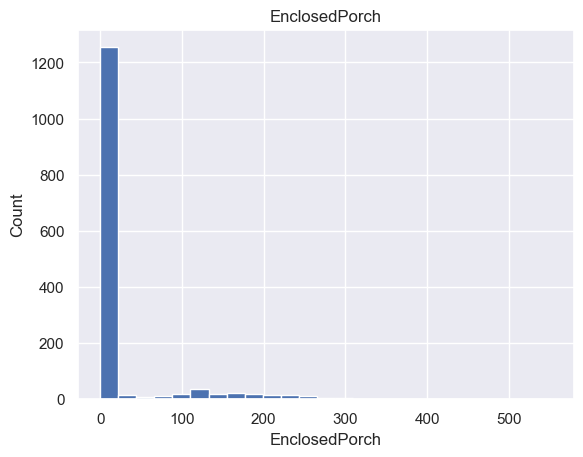

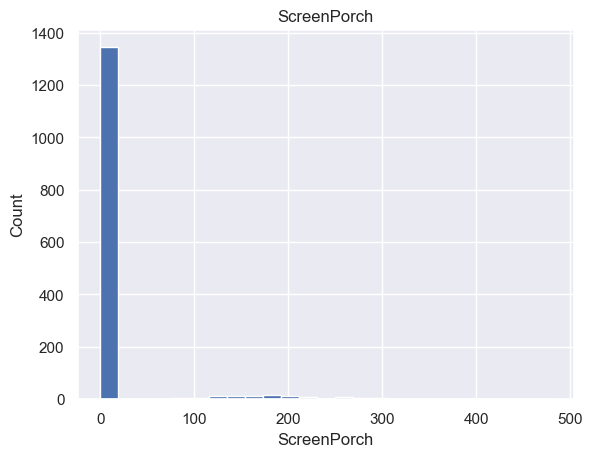

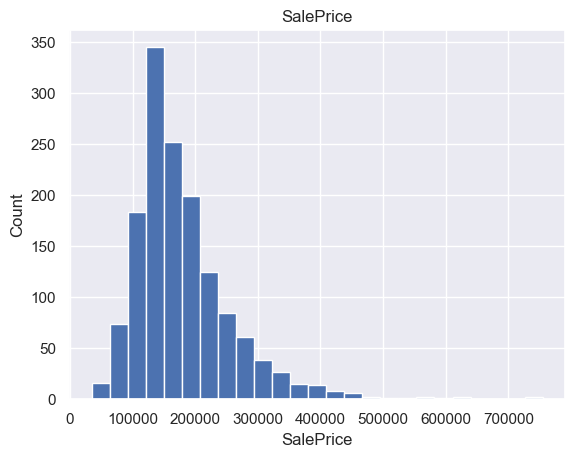

In [64]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Step 8:Market Trends and Historical Pricing

#### Understanding these market trends and historical pricing patterns can provide valuable insights for investors, developers, and homebuyers in the real estate sector.


Text(0.5, 1.0, 'House Price vs YearSold')

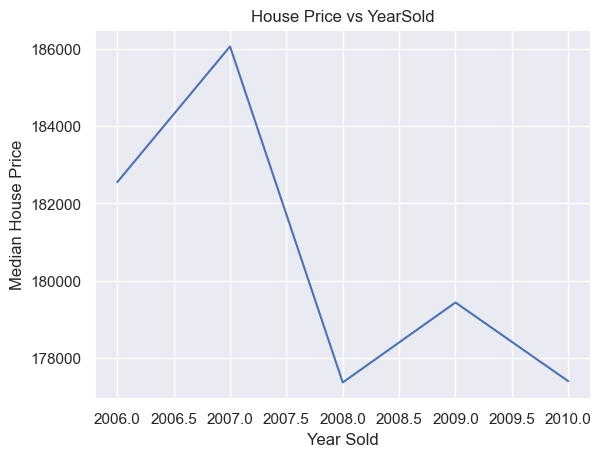

In [65]:
## We will check whether there is a relation between year the house is sold and the sales price

df.groupby('YrSold')['SalePrice'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')    
plt.title("House Price vs YearSold")

### Step 9:. Customer Preferences and Amenities

#### By understanding customer preferences and incorporating in-demand amenities, real estate developers and investors can create attractive and livable communities that meet the evolving needs of homebuyers and renters.

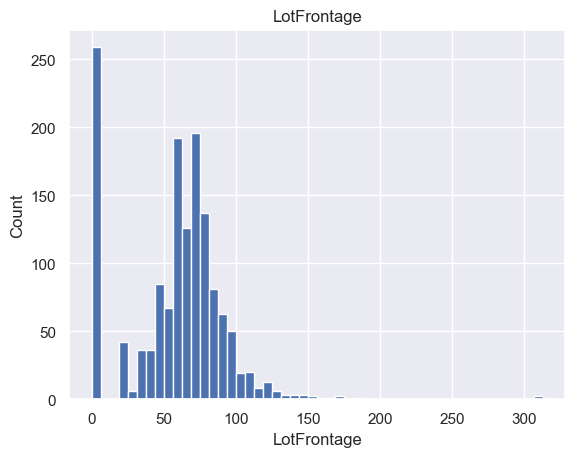

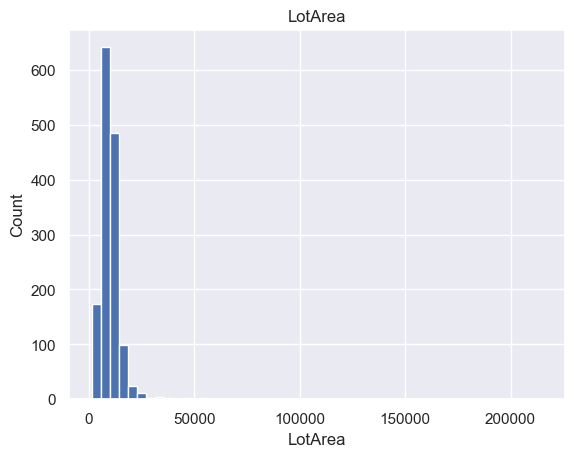

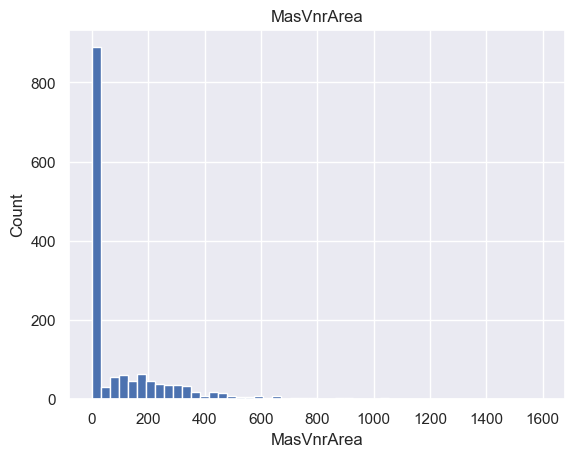

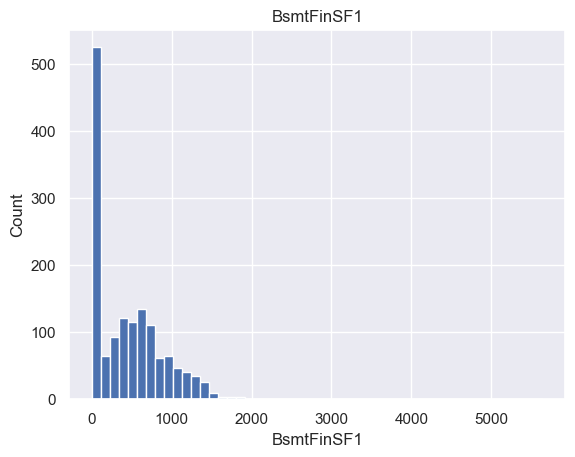

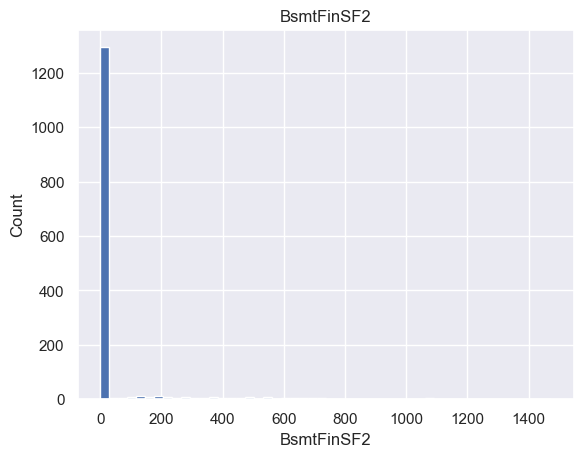

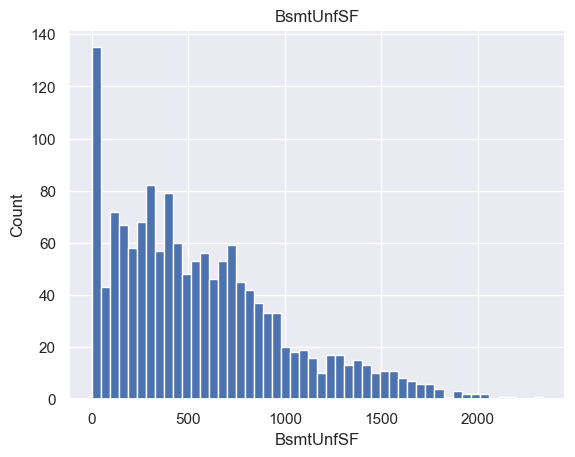

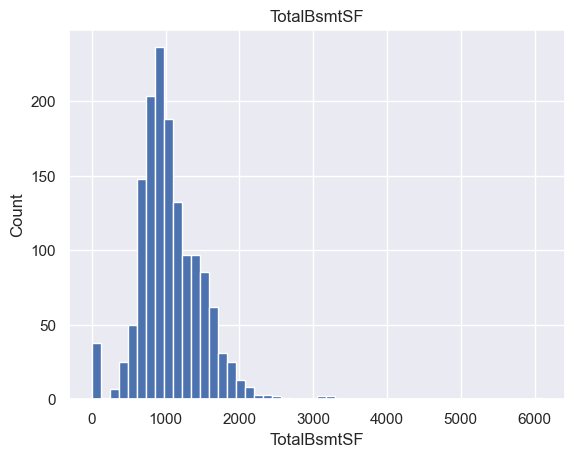

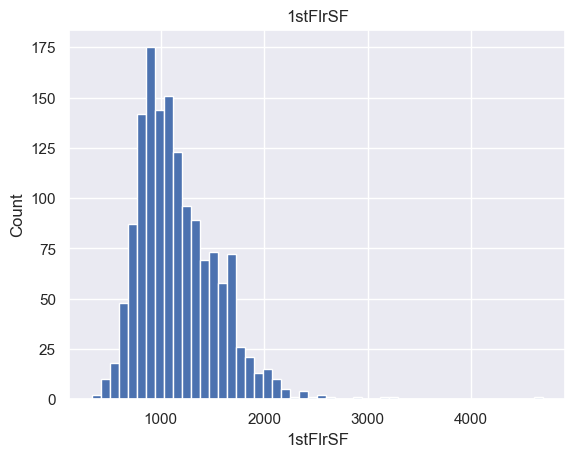

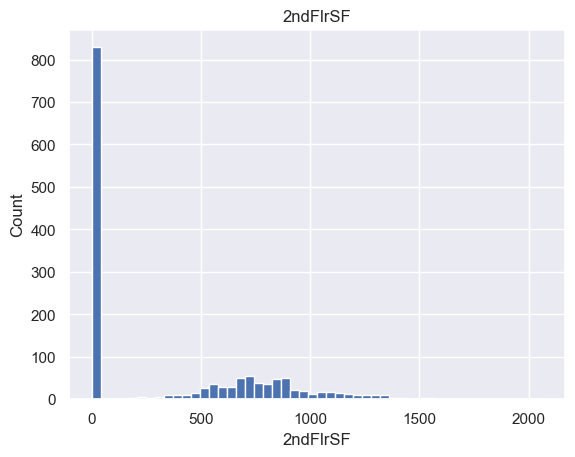

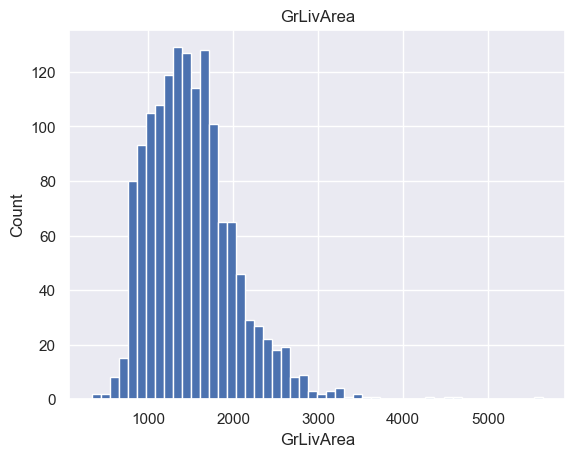

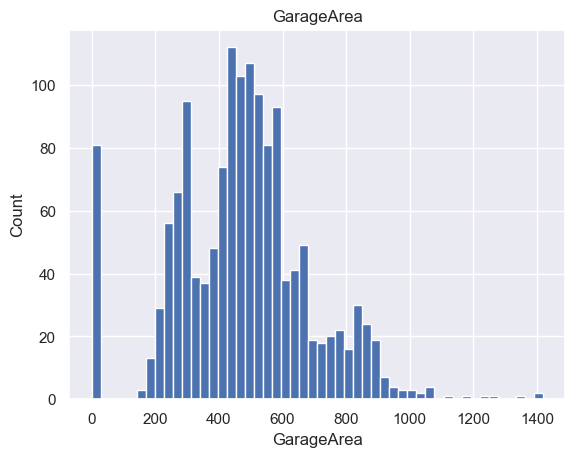

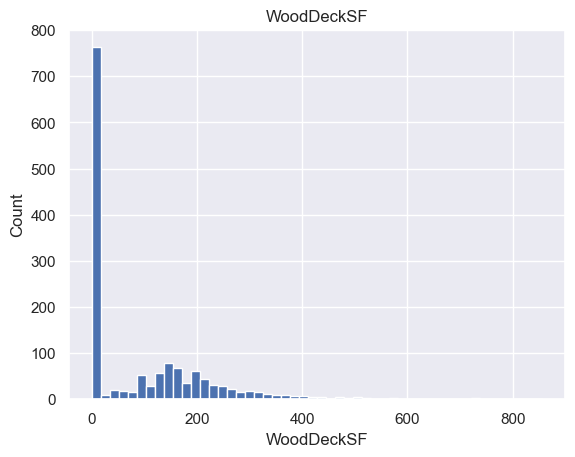

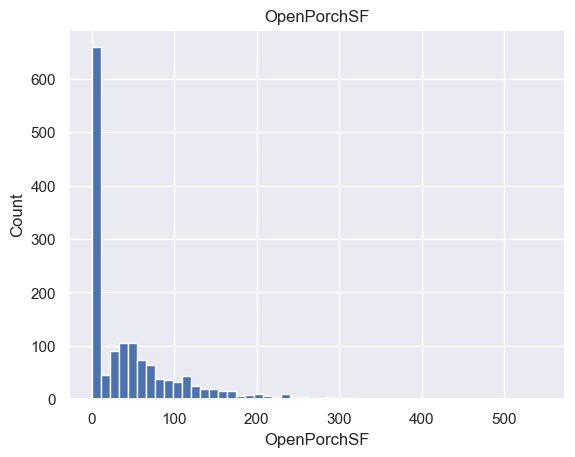

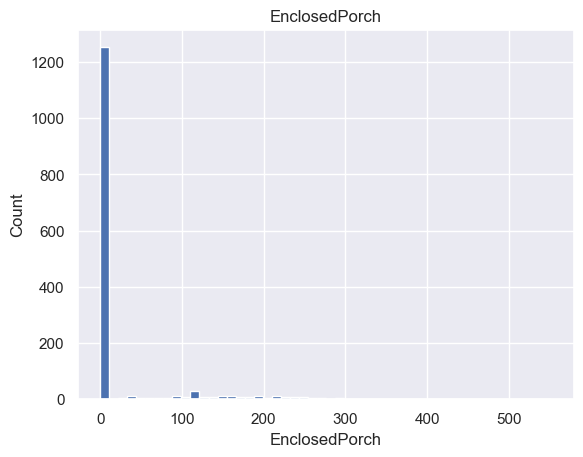

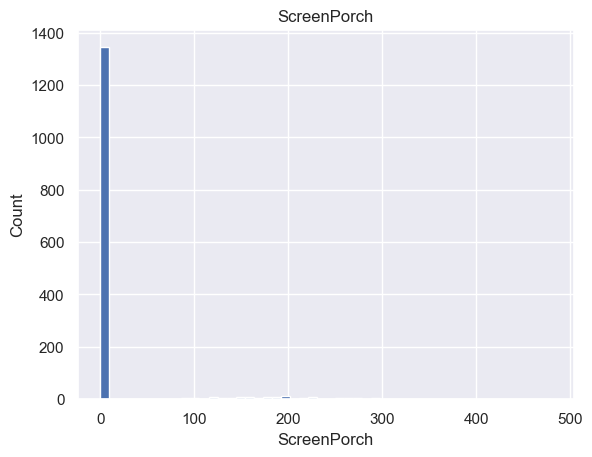

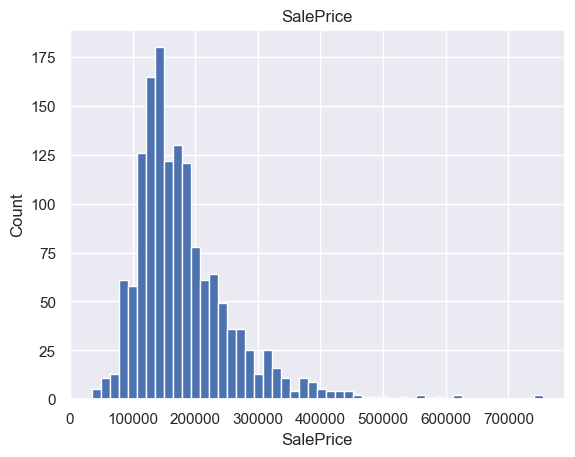

In [66]:
for feature in continuous_feature:
 data=df.copy()
 data[feature].hist(bins=50)
 plt.xlabel(feature)
 plt.ylabel("Count")
 plt.title(feature)
 plt.show()